In [1]:
library(mgcv)
library(psych)
library(ggplot2)
library(corrplot)
library(RColorBrewer)
library(WVPlots)
library(reshape2)
library(lars)
library(MASS)
library(glmnet)
library(dplyr) # %>%

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Warning message:
"package 'psych' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded

Warning message:
"package 'WVPlots' was built under R version 3.6.3"
Loading required package: wrapr

Warning message:
"package 'wrapr' was built under R version 3.6.3"

Attaching package: 'wrapr'


The following object is masked from 'package:mgcv':

    %.%


Warning message:
"package 'reshape2' was built under R version 3.6.3"
Loaded lars 1.2



Attaching package: 'lars'


The following object is masked from 'package:psych':

    error.bars


Warning messa

In [158]:
library(islasso)

Warning message:
"package 'islasso' was built under R version 3.6.3"


In [92]:
library(data.table) #fread

Warning message:
"package 'data.table' was built under R version 3.6.3"

Attaching package: 'data.table'


The following objects are masked from 'package:reshape2':

    dcast, melt


The following object is masked from 'package:wrapr':

    :=




In [161]:
library(ridge)

Warning message:
"package 'ridge' was built under R version 3.6.3"


In [ ]:
mycolor = brewer.pal(9, "Set1")

In [2]:
df = read.csv("../../data/tidy/system-model-19-04.csv")

In [16]:
head(df)
df = df [-(1:5),]
df = df [,-(1:5)]

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
6,6,2019,4,1,10,1157.9279,117.5028,63.17194,21.10694,15.07417,...,33.21694,52.21750,15.46083,5.102500,19.38688,9.854472,19134.9,2,42,53.894
7,7,2019,4,1,11,1015.1473,104.4983,55.72083,19.12222,14.50750,...,28.31611,48.17361,13.63389,4.438056,18.03608,9.714483,17253.1,2,42,49.551
8,8,2019,4,1,12,987.7224,106.6147,58.56194,19.76028,12.88806,...,28.26639,50.29861,13.49528,4.503333,18.57697,9.264409,17870.3,2,42,48.963
9,9,2019,4,1,13,947.9956,106.5056,61.61694,16.85667,12.75944,...,27.08194,52.34806,13.50861,4.230000,18.60897,8.900903,18464.4,2,42,49.200
10,10,2019,4,1,14,1069.2355,141.7883,91.71944,19.22333,13.67806,...,31.45056,77.62778,14.68083,4.839444,19.24698,7.541068,24528.1,2,42,50.928
11,11,2019,4,1,15,1246.3414,141.4372,84.90639,20.30056,14.82972,...,37.28361,69.25000,17.03083,5.454167,19.30834,8.811976,31965.0,2,42,54.272


In [17]:
head(df)

,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,accel_bin_1_time_hr,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
11,1246.341,141.4372,84.90639,20.30056,14.82972,10.37389,11.024722,10.50278,37.28361,69.25000,17.03083,5.454167,19.30834,8.811976,31965.0,2,42,54.272
12,1317.283,170.2719,110.81639,21.18667,16.47056,10.29889,11.499444,10.89806,39.56722,95.74389,18.12722,5.766667,19.18128,7.736348,45203.8,2,42,56.268
13,1372.403,174.9803,114.06111,22.42778,15.52556,11.08444,11.879722,11.63944,42.32806,96.35194,18.35472,6.184444,19.07073,7.843187,58915.7,2,42,57.666
14,1340.505,151.7219,91.61639,22.22833,15.28278,11.08472,11.509444,11.86750,40.92222,74.91472,17.47028,6.325278,19.37017,8.835275,38218.2,2,42,57.869
15,1241.566,137.0142,79.48222,21.33222,16.25361,10.03472,9.911389,10.97167,34.38694,68.98972,16.61250,5.472222,19.05306,9.061587,22771.3,2,42,55.056
16,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,20.0,2,42,32.387


In [19]:
# Correlation matrix
df_var_plot = df[,-16]
df_var_plot = na.omit(df_var_plot)
matrix = cor(df_var_plot)

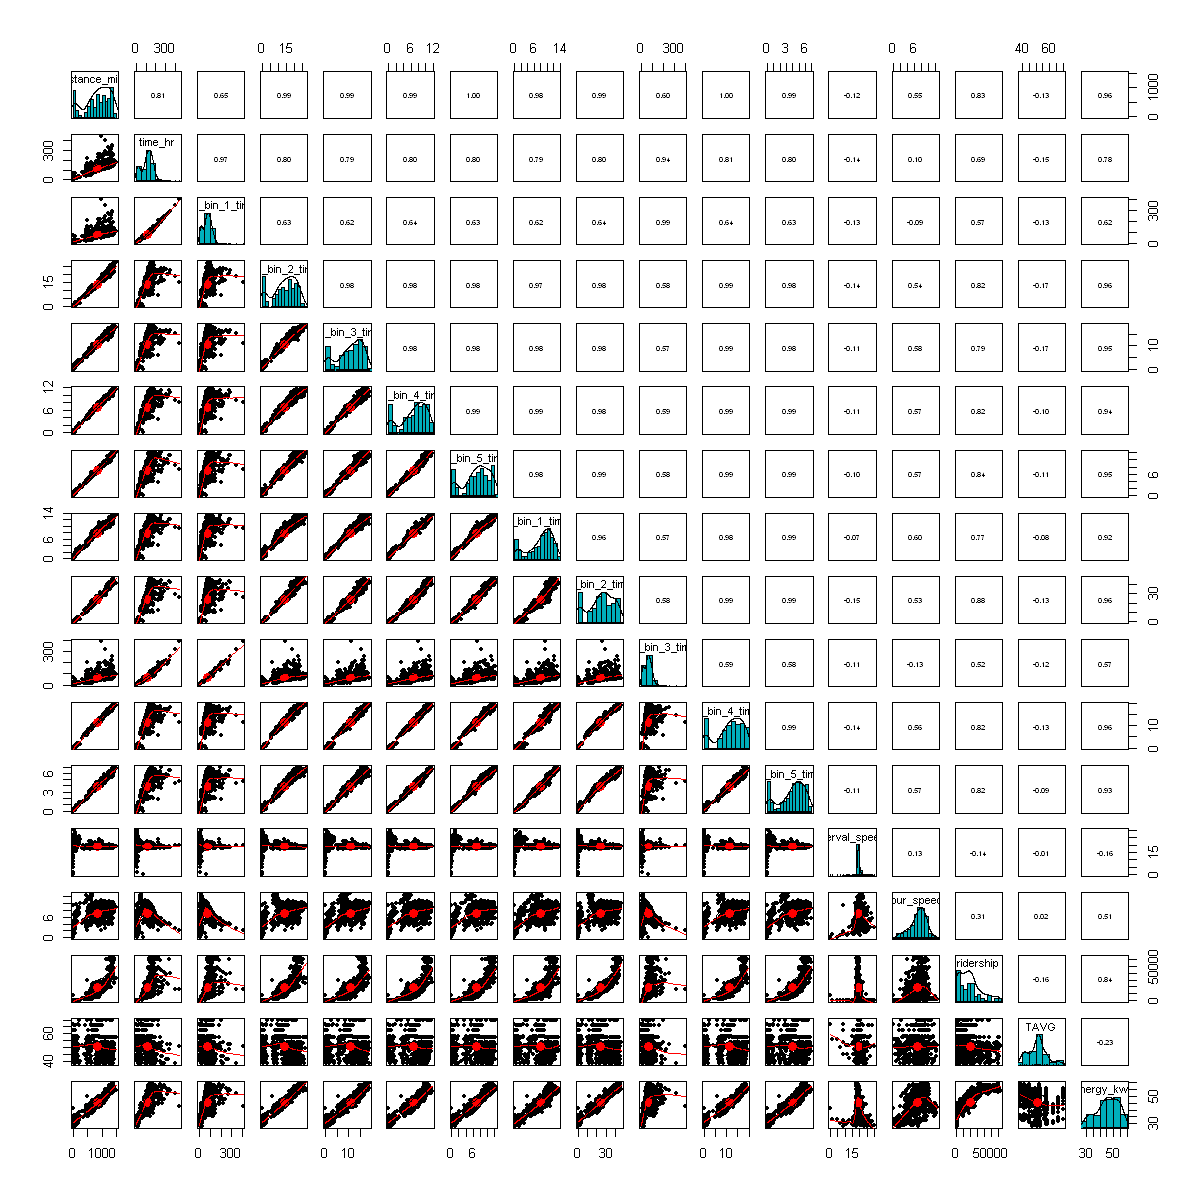

In [20]:
options(repr.plot.width = 10, repr.plot.height = 10)
pairs.panels(df_var_plot, 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE, # show correlation ellipses
             )

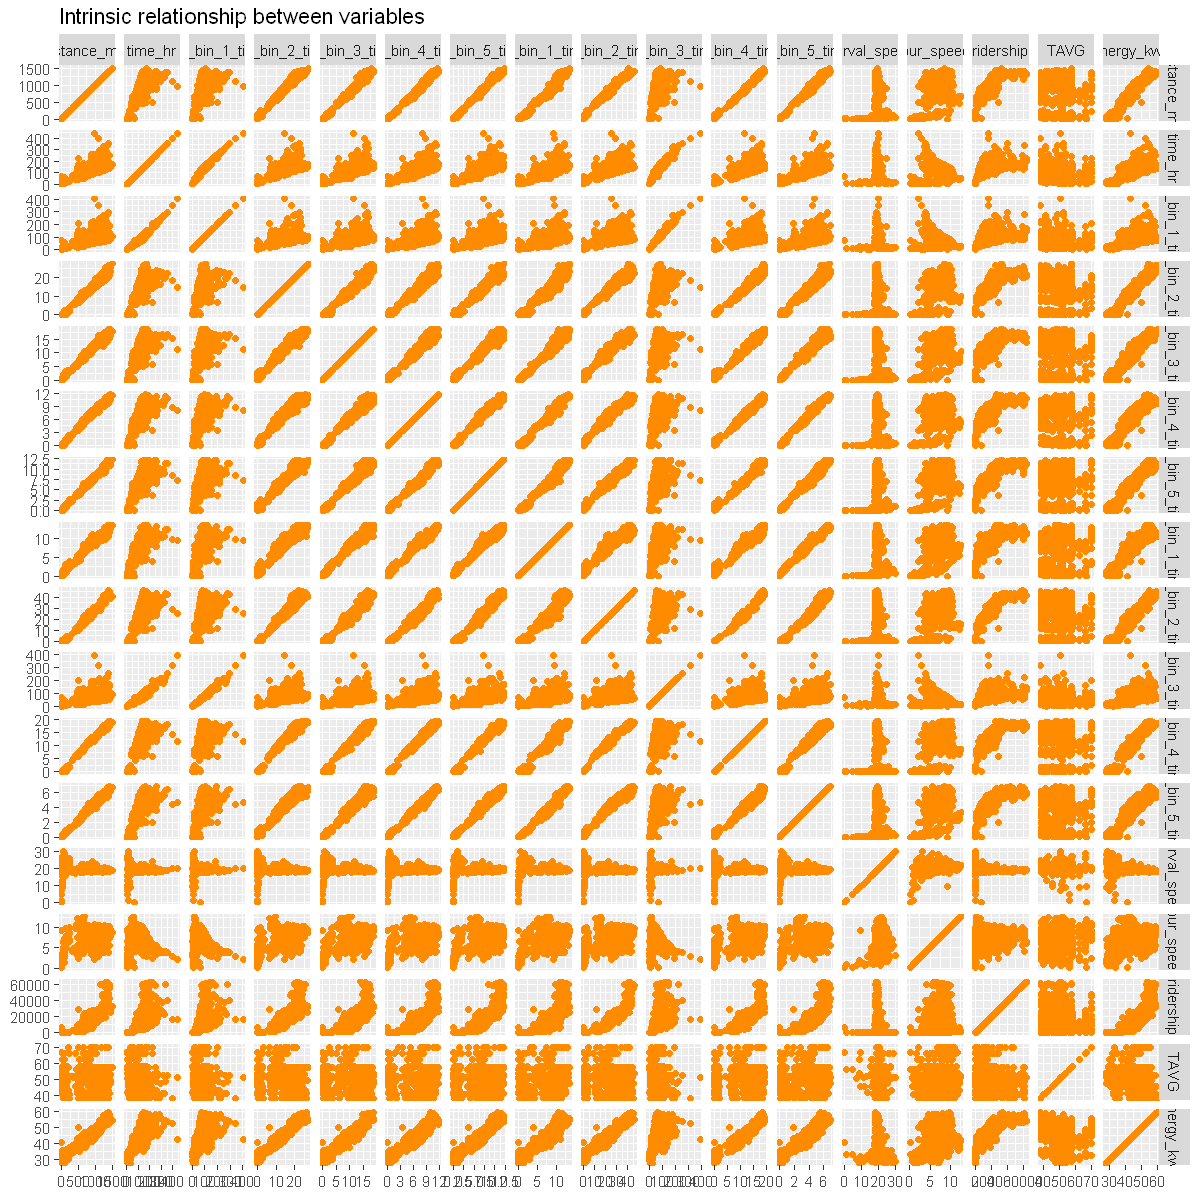

In [21]:
# Plot correlaton scattered plot
#png("../../figures/Intrinsic-relationship-plot-April-2019.png",height=6000,width=6000,res=360)
PairPlot(df_var_plot,colnames(df_var_plot),"Intrinsic relationship between variables", palette=NULL,point_color = "darkorange")
#dev.off()

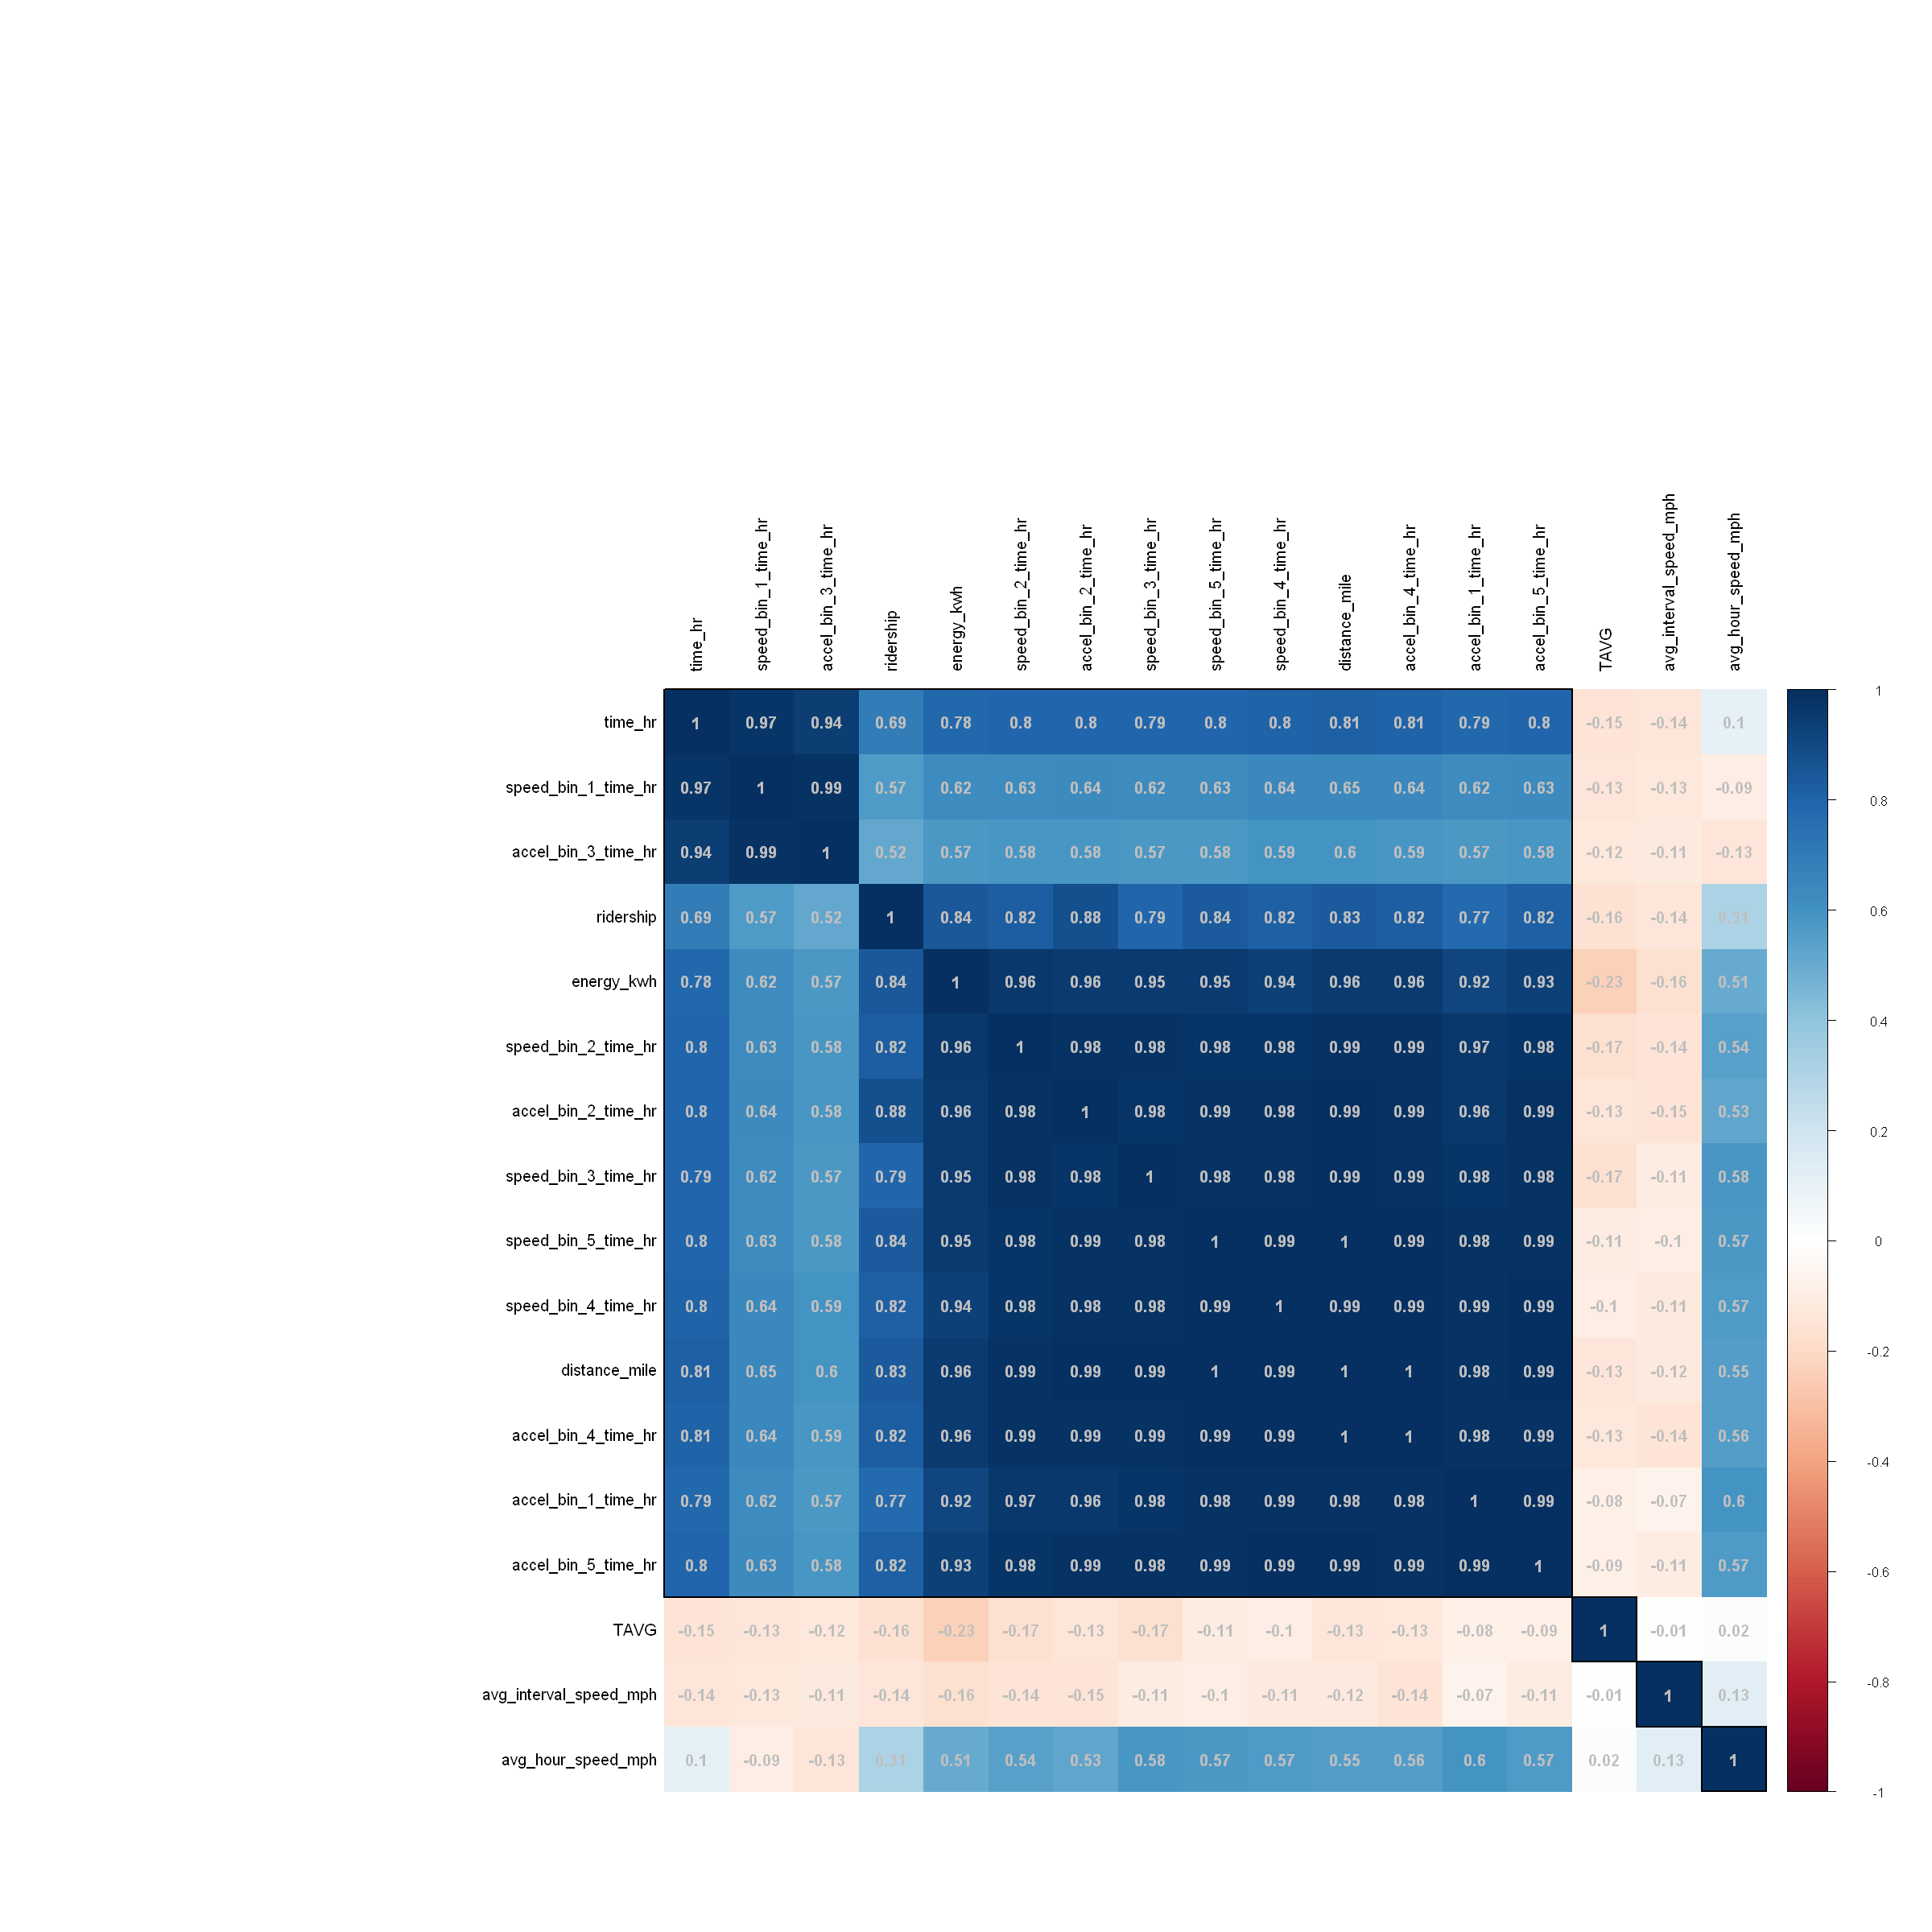

In [25]:
# correleation plot with numbers
options(repr.plot.width = 20, repr.plot.height = 20)
#png("../../figures/correleation-plot-April-2019.png",height=5000,width=5000,res=360)
corrplot(corr = matrix,method = "color",order = "hclust",tl.col="black",addrect=4,addCoef.col = "grey")
#dev.off()

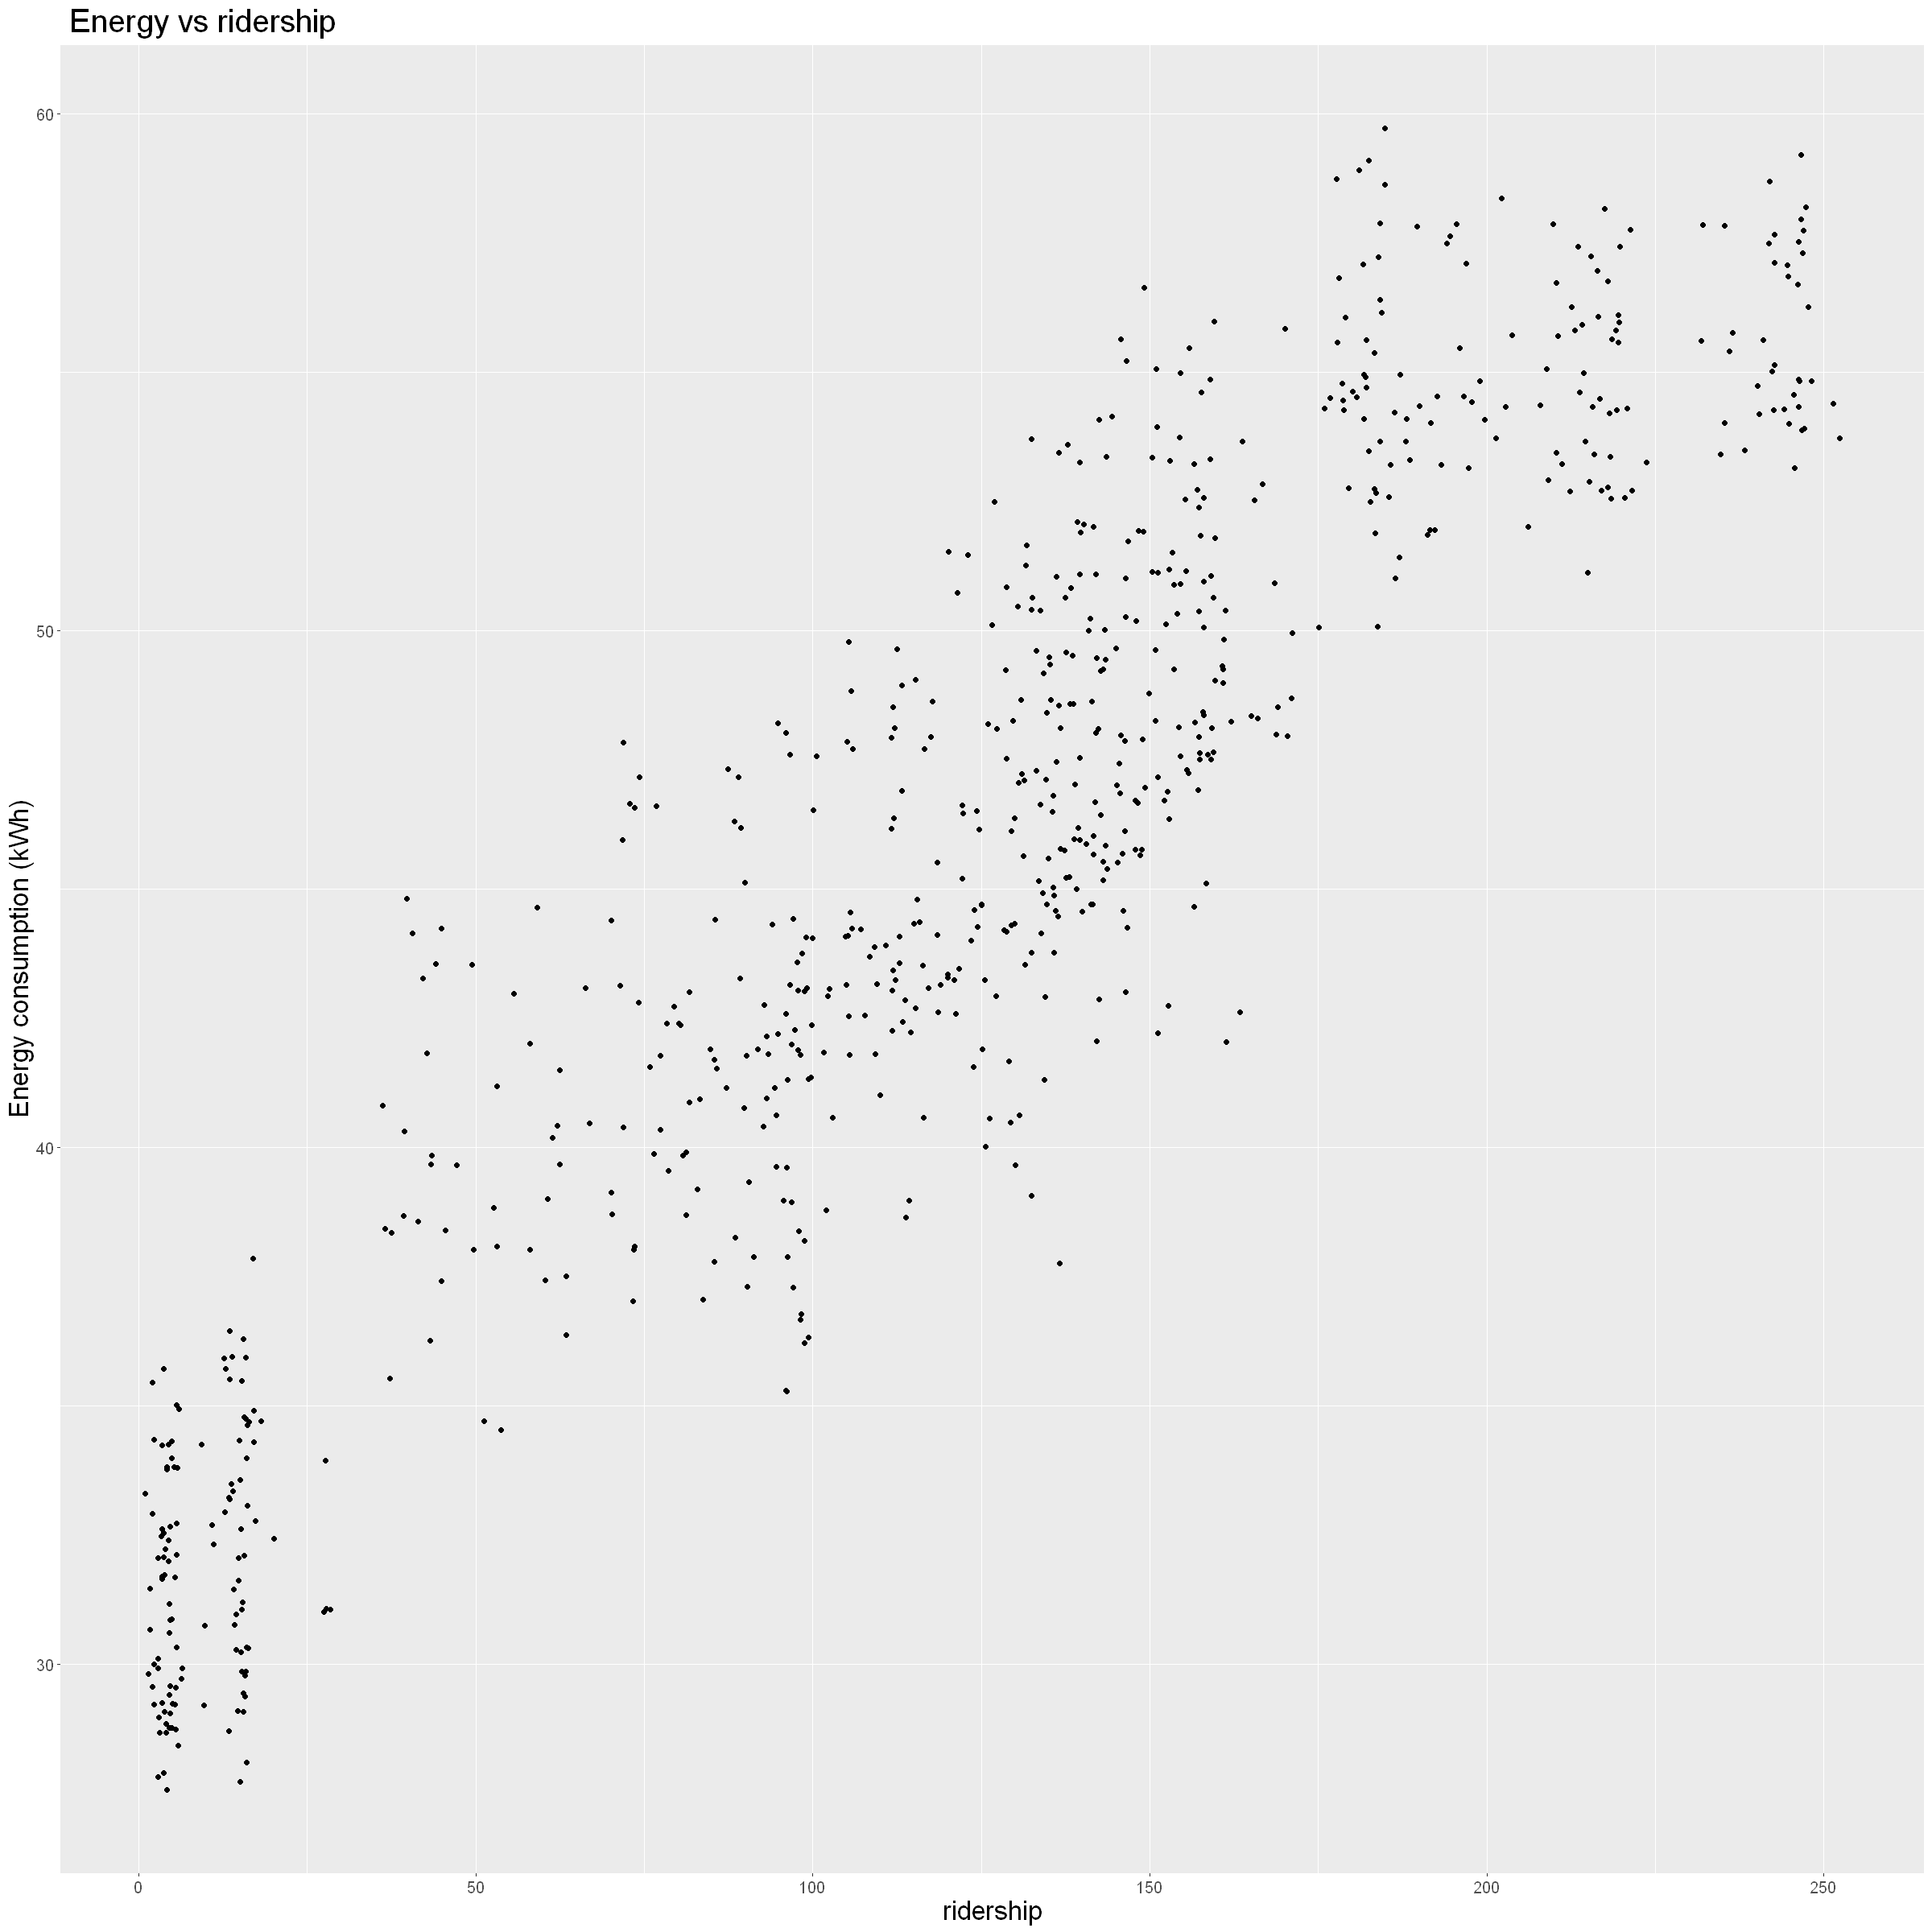

In [28]:
# Energy vs ridership plot
ggplot(df) + 
 geom_point(aes(x=sqrt(ridership), y=energy_kwh)) +
 theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Energy vs ridership ", y = "Energy consumption (kWh)", x = "ridership")

In [29]:
# Dummy variables transfer
df$weekends_weekday = as.factor(df$weekends_weekday)

In [30]:
#Split the hour data
set.seed(1234)
rate = 0.8
sub = sample(1:nrow(df),round(nrow(df)*rate))#the split ratio is 0.8
dfh_train = df[sub,]
dfh_test = df[-sub,]

In [106]:
summary(modelFit_hour_linear)


Call:
lm(formula = energy_kwh ~ ridership + avg_interval_speed_mph + 
    avg_hour_speed_mph + speed_bin_1_time_hr + speed_bin_2_time_hr + 
    speed_bin_3_time_hr + speed_bin_4_time_hr + speed_bin_5_time_hr + 
    accel_bin_1_time_hr + accel_bin_2_time_hr + accel_bin_3_time_hr + 
    accel_bin_4_time_hr + accel_bin_5_time_hr + speed_bin_1_time_hr * 
    accel_bin_1_time_hr + speed_bin_1_time_hr * accel_bin_2_time_hr + 
    speed_bin_1_time_hr * accel_bin_3_time_hr + speed_bin_1_time_hr * 
    accel_bin_4_time_hr + speed_bin_1_time_hr * accel_bin_5_time_hr + 
    speed_bin_2_time_hr * accel_bin_1_time_hr + speed_bin_2_time_hr * 
    accel_bin_2_time_hr + speed_bin_2_time_hr * accel_bin_3_time_hr + 
    speed_bin_2_time_hr * accel_bin_4_time_hr + speed_bin_2_time_hr * 
    accel_bin_5_time_hr + speed_bin_3_time_hr * accel_bin_1_time_hr + 
    speed_bin_3_time_hr * accel_bin_2_time_hr + speed_bin_3_time_hr * 
    accel_bin_3_time_hr + speed_bin_3_time_hr * accel_bin_4_time_hr + 
    spe

In [33]:
# linear regression
modelFit_hour_linear= lm(energy_kwh ~ ridership + avg_interval_speed_mph +
                         avg_hour_speed_mph +
                         # Speed bin
                         speed_bin_1_time_hr + speed_bin_2_time_hr + 
                         speed_bin_3_time_hr +
                         speed_bin_4_time_hr + speed_bin_5_time_hr +
                         # Acceleration bin
                         accel_bin_1_time_hr + accel_bin_2_time_hr + 
                         accel_bin_3_time_hr + accel_bin_4_time_hr + 
                         accel_bin_5_time_hr +
                         # Interaction term
                         speed_bin_1_time_hr* accel_bin_1_time_hr +
                         speed_bin_1_time_hr* accel_bin_2_time_hr + 
                         speed_bin_1_time_hr* accel_bin_3_time_hr +
                         speed_bin_1_time_hr* accel_bin_4_time_hr +
                         speed_bin_1_time_hr* accel_bin_5_time_hr +
                         speed_bin_2_time_hr* accel_bin_1_time_hr +
                         speed_bin_2_time_hr* accel_bin_2_time_hr + 
                         speed_bin_2_time_hr* accel_bin_3_time_hr +
                         speed_bin_2_time_hr* accel_bin_4_time_hr +
                         speed_bin_2_time_hr* accel_bin_5_time_hr +
                         speed_bin_3_time_hr* accel_bin_1_time_hr +
                         speed_bin_3_time_hr* accel_bin_2_time_hr + 
                         speed_bin_3_time_hr* accel_bin_3_time_hr +
                         speed_bin_3_time_hr* accel_bin_4_time_hr +
                         speed_bin_3_time_hr* accel_bin_5_time_hr +
                         speed_bin_4_time_hr* accel_bin_1_time_hr +
                         speed_bin_4_time_hr* accel_bin_2_time_hr + 
                         speed_bin_4_time_hr* accel_bin_3_time_hr +
                         speed_bin_4_time_hr* accel_bin_4_time_hr +
                         speed_bin_4_time_hr* accel_bin_5_time_hr +
                         speed_bin_5_time_hr* accel_bin_1_time_hr +
                         speed_bin_5_time_hr* accel_bin_2_time_hr + 
                         speed_bin_5_time_hr* accel_bin_3_time_hr +
                         speed_bin_5_time_hr* accel_bin_4_time_hr +
                         speed_bin_5_time_hr* accel_bin_5_time_hr +
                         TAVG,data = dfh_train)#select=TRUE weekends_weekday)
summary(modelFit_hour_linear)


Call:
lm(formula = energy_kwh ~ ridership + avg_interval_speed_mph + 
    avg_hour_speed_mph + speed_bin_1_time_hr + speed_bin_2_time_hr + 
    speed_bin_3_time_hr + speed_bin_4_time_hr + speed_bin_5_time_hr + 
    accel_bin_1_time_hr + accel_bin_2_time_hr + accel_bin_3_time_hr + 
    accel_bin_4_time_hr + accel_bin_5_time_hr + speed_bin_1_time_hr * 
    accel_bin_1_time_hr + speed_bin_1_time_hr * accel_bin_2_time_hr + 
    speed_bin_1_time_hr * accel_bin_3_time_hr + speed_bin_1_time_hr * 
    accel_bin_4_time_hr + speed_bin_1_time_hr * accel_bin_5_time_hr + 
    speed_bin_2_time_hr * accel_bin_1_time_hr + speed_bin_2_time_hr * 
    accel_bin_2_time_hr + speed_bin_2_time_hr * accel_bin_3_time_hr + 
    speed_bin_2_time_hr * accel_bin_4_time_hr + speed_bin_2_time_hr * 
    accel_bin_5_time_hr + speed_bin_3_time_hr * accel_bin_1_time_hr + 
    speed_bin_3_time_hr * accel_bin_2_time_hr + speed_bin_3_time_hr * 
    accel_bin_3_time_hr + speed_bin_3_time_hr * accel_bin_4_time_hr + 
    spe

In [35]:
# Linear model prediction
pred_linear <- predict.lm(modelFit_hour_linear, dfh_test)

In [42]:
head(test_compare )

,Observed.Response,X.Linear_model
,<dbl>,<dbl>
15,55.056,53.85560
16,32.387,NA
18,49.640,48.31787
19,49.773,47.01731
26,53.998,50.67805
30,53.247,52.75305


In [41]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred_linear)

Warning message:
"Removed 11 rows containing missing values (geom_point)."


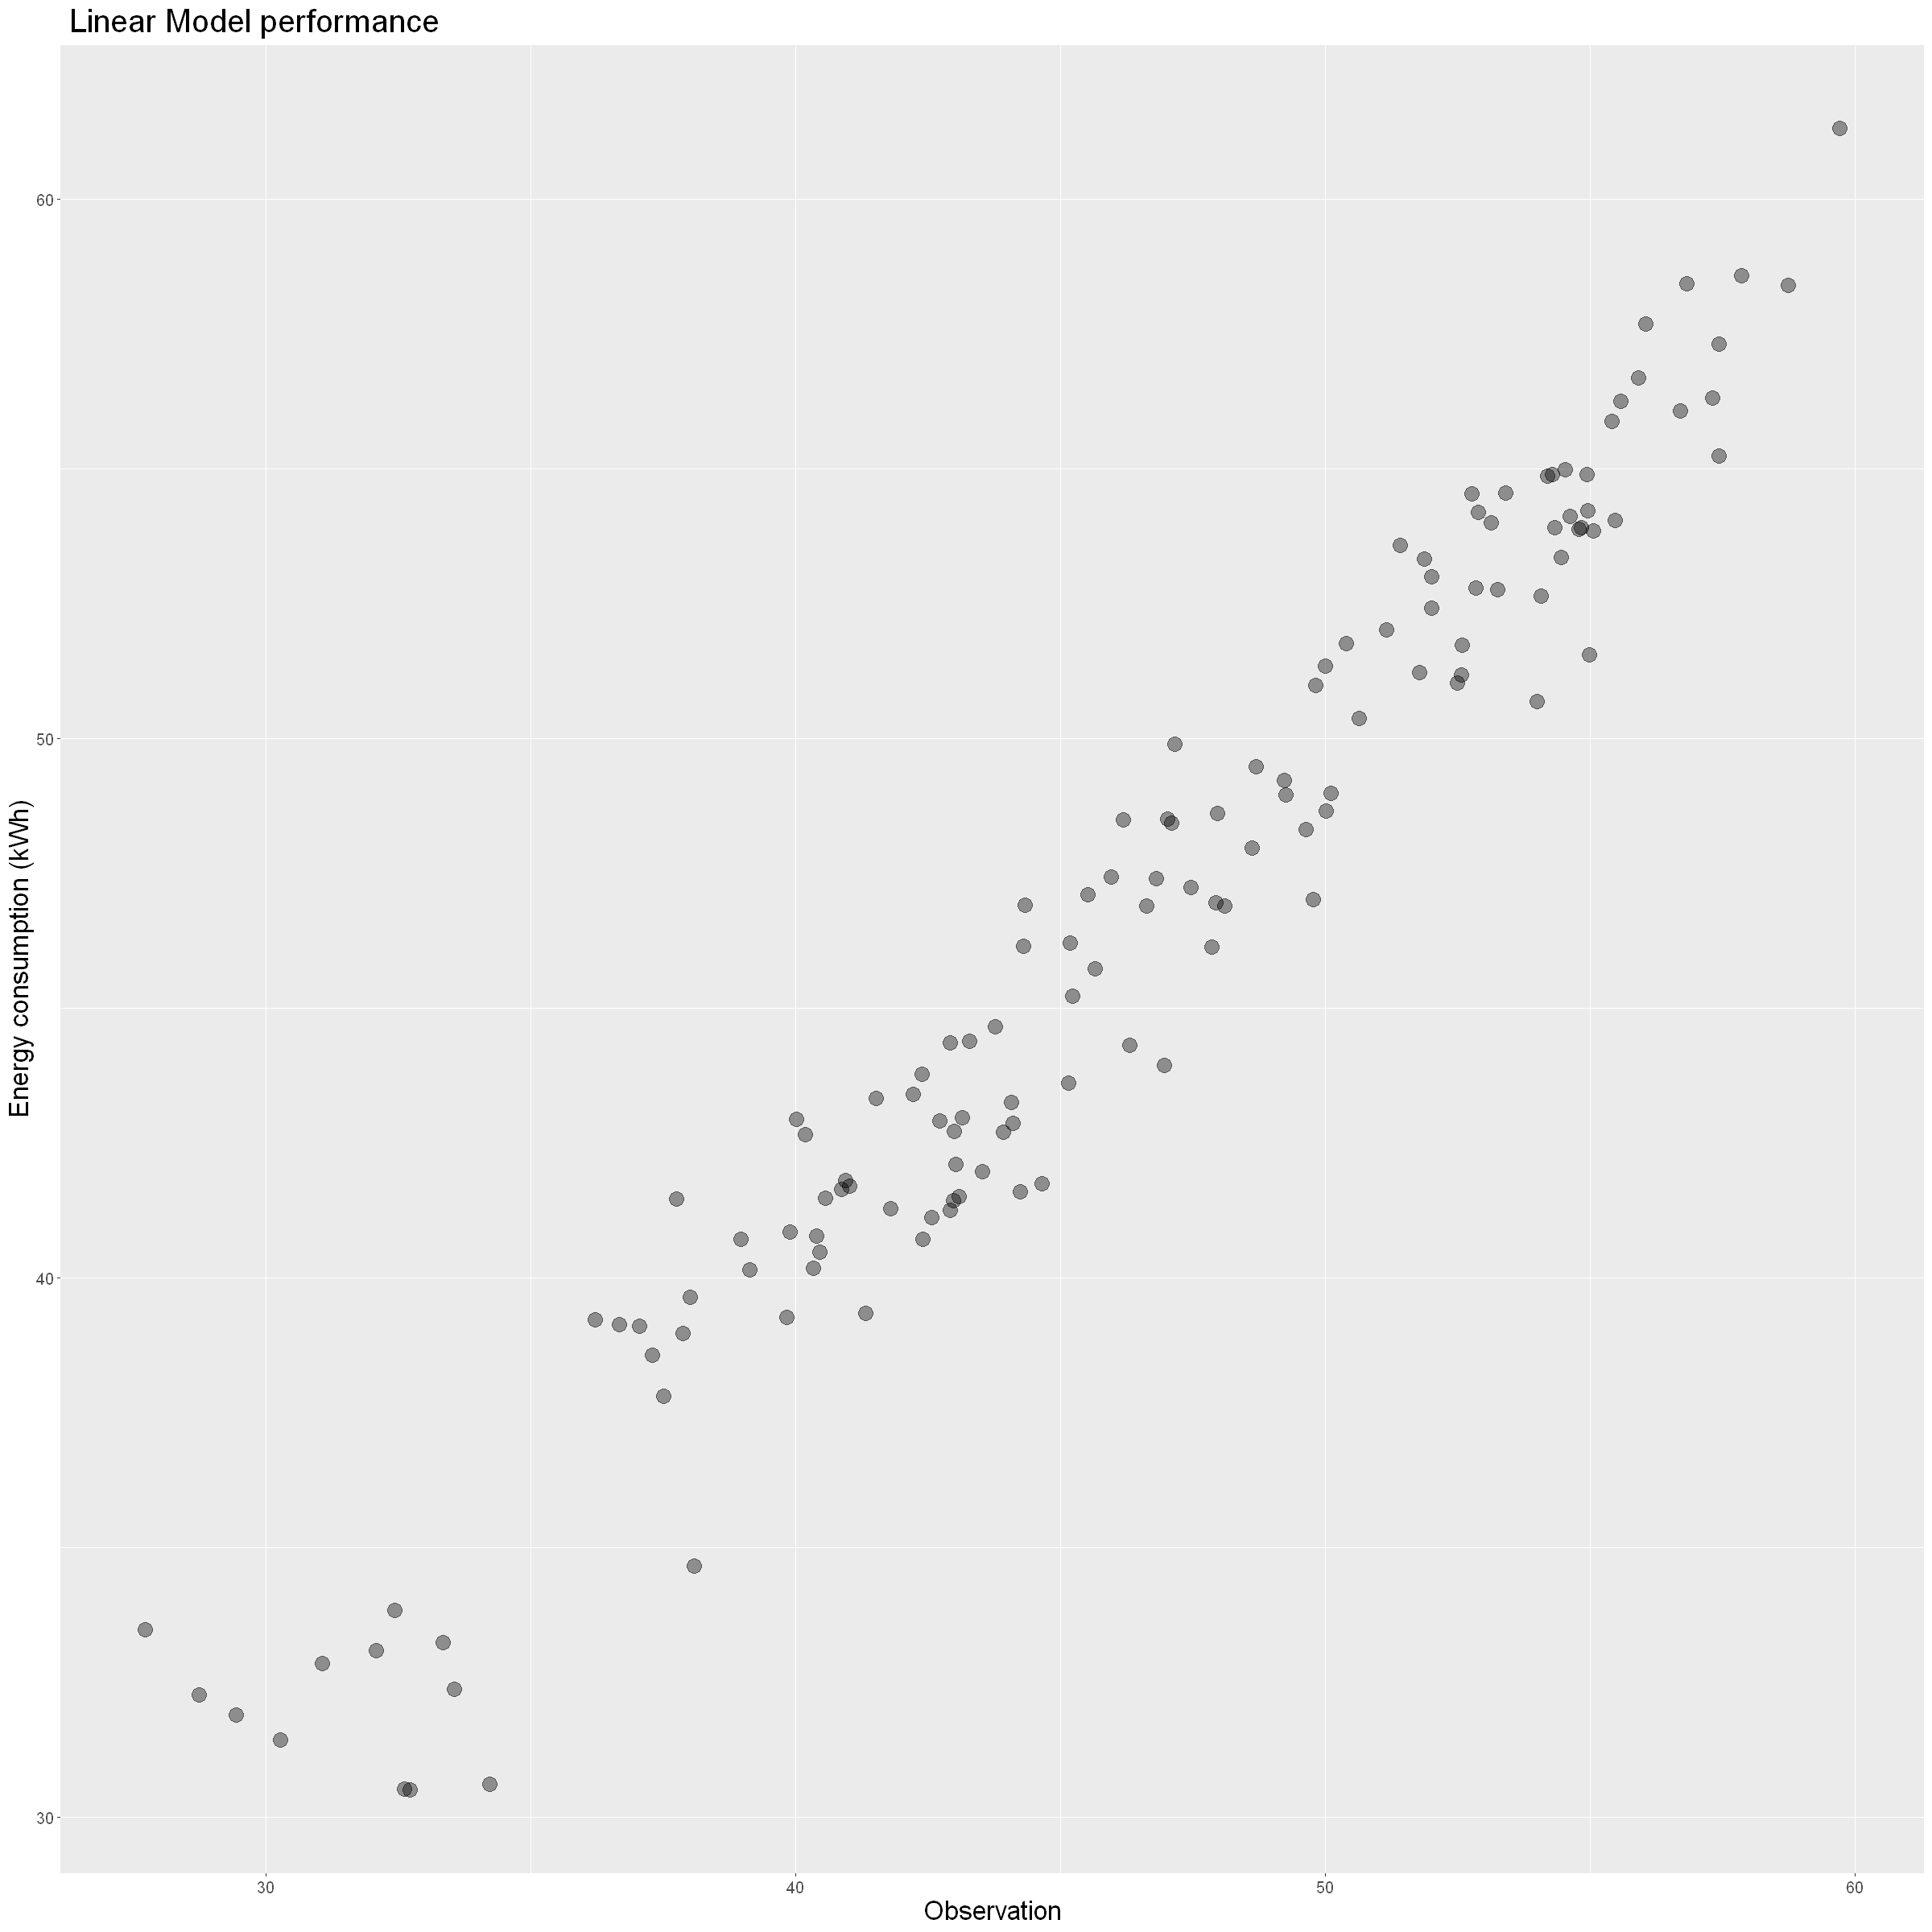

In [47]:
# png("../../figures/Linear-model-April-2019.png",height=4000,width=5000,res=360)
ggplot(test_compare) + 
 geom_point(aes(x = Observed.Response, y = X.Linear_model),size = 5,alpha = 0.4) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Observation")
# dev.off()

In [147]:
head(dfh_test)

,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,accel_bin_1_time_hr,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
15,1241.5658,137.0142,79.48222,21.33222,16.25361,10.034722,9.911389,10.971667,34.38694,68.98972,16.61250,5.472222,19.05306,9.061587,22771.3,2,42.0,55.056
16,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,20.0,2,42.0,32.387
18,927.6391,107.9333,64.28528,16.82667,11.50028,7.176944,8.144167,8.851111,23.50750,45.55306,12.62417,4.107500,19.59571,8.594556,12661.3,2,42.0,49.640
19,885.3706,109.9878,69.21056,15.02222,10.52472,7.252222,7.978056,8.310833,23.14889,62.20583,12.10861,3.951389,20.37658,8.049718,11084.2,2,42.0,49.773
26,1159.6530,133.5122,78.94389,21.02333,15.58444,9.374444,8.586111,9.756389,37.22583,64.06472,15.78361,5.729722,18.37129,8.685744,59943.8,2,42.0,53.998
30,1150.6170,142.5253,88.70056,20.70972,15.43972,8.558889,9.062500,10.371389,33.35278,77.07556,15.82333,5.137500,18.14141,8.073073,19492.8,2,41.5,53.247


In [148]:
dfh_lasso = dfh_test[,-16]
dfh_test_lasso = na.omit(dfh_lasso)
dfh_test_lasso$speed_bin_1_time_hr_accel_bin_1_time_hr = dfh_test_lasso$speed_bin_1_time_hr* dfh_test_lasso$accel_bin_1_time_hr
dfh_test_lasso$speed_bin_1_time_hr_accel_bin_2_time_hr = dfh_test_lasso$speed_bin_1_time_hr* dfh_test_lasso$accel_bin_2_time_hr
dfh_test_lasso$speed_bin_1_time_hr_accel_bin_3_time_hr = dfh_test_lasso$speed_bin_1_time_hr* dfh_test_lasso$accel_bin_3_time_hr
dfh_test_lasso$speed_bin_1_time_hr_accel_bin_4_time_hr = dfh_test_lasso$speed_bin_1_time_hr* dfh_test_lasso$accel_bin_4_time_hr
dfh_test_lasso$speed_bin_1_time_hr_accel_bin_5_time_hr = dfh_test_lasso$speed_bin_1_time_hr* dfh_test_lasso$accel_bin_5_time_hr
dfh_test_lasso$speed_bin_2_time_hr_accel_bin_1_time_hr = dfh_test_lasso$speed_bin_2_time_hr* dfh_test_lasso$accel_bin_1_time_hr
dfh_test_lasso$speed_bin_2_time_hr_accel_bin_2_time_hr = dfh_test_lasso$speed_bin_2_time_hr* dfh_test_lasso$accel_bin_2_time_hr
dfh_test_lasso$speed_bin_2_time_hr_accel_bin_3_time_hr = dfh_test_lasso$speed_bin_2_time_hr* dfh_test_lasso$accel_bin_3_time_hr
dfh_test_lasso$speed_bin_2_time_hr_accel_bin_4_time_hr = dfh_test_lasso$speed_bin_2_time_hr* dfh_test_lasso$accel_bin_4_time_hr
dfh_test_lasso$speed_bin_2_time_hr_accel_bin_5_time_hr = dfh_test_lasso$speed_bin_2_time_hr* dfh_test_lasso$accel_bin_5_time_hr
dfh_test_lasso$speed_bin_3_time_hr_accel_bin_1_time_hr = dfh_test_lasso$speed_bin_3_time_hr* dfh_test_lasso$accel_bin_1_time_hr
dfh_test_lasso$speed_bin_3_time_hr_accel_bin_2_time_hr = dfh_test_lasso$speed_bin_3_time_hr* dfh_test_lasso$accel_bin_2_time_hr
dfh_test_lasso$speed_bin_3_time_hr_accel_bin_3_time_hr = dfh_test_lasso$speed_bin_3_time_hr* dfh_test_lasso$accel_bin_3_time_hr
dfh_test_lasso$speed_bin_3_time_hr_accel_bin_4_time_hr = dfh_test_lasso$speed_bin_3_time_hr* dfh_test_lasso$accel_bin_4_time_hr
dfh_test_lasso$speed_bin_3_time_hr_accel_bin_5_time_hr = dfh_test_lasso$speed_bin_3_time_hr* dfh_test_lasso$accel_bin_5_time_hr
dfh_test_lasso$speed_bin_4_time_hr_accel_bin_1_time_hr = dfh_test_lasso$speed_bin_4_time_hr* dfh_test_lasso$accel_bin_1_time_hr
dfh_test_lasso$speed_bin_4_time_hr_accel_bin_2_time_hr = dfh_test_lasso$speed_bin_4_time_hr* dfh_test_lasso$accel_bin_2_time_hr
dfh_test_lasso$speed_bin_4_time_hr_accel_bin_3_time_hr = dfh_test_lasso$speed_bin_4_time_hr* dfh_test_lasso$accel_bin_3_time_hr
dfh_test_lasso$speed_bin_4_time_hr_accel_bin_4_time_hr = dfh_test_lasso$speed_bin_4_time_hr* dfh_test_lasso$accel_bin_4_time_hr
dfh_test_lasso$speed_bin_4_time_hr_accel_bin_5_time_hr = dfh_test_lasso$speed_bin_5_time_hr* dfh_test_lasso$accel_bin_5_time_hr
dfh_test_lasso$speed_bin_5_time_hr_accel_bin_1_time_hr = dfh_test_lasso$speed_bin_5_time_hr* dfh_test_lasso$accel_bin_1_time_hr
dfh_test_lasso$speed_bin_5_time_hr_accel_bin_2_time_hr = dfh_test_lasso$speed_bin_5_time_hr* dfh_test_lasso$accel_bin_2_time_hr
dfh_test_lasso$speed_bin_5_time_hr_accel_bin_3_time_hr = dfh_test_lasso$speed_bin_5_time_hr* dfh_test_lasso$accel_bin_3_time_hr
dfh_test_lasso$speed_bin_5_time_hr_accel_bin_4_time_hr = dfh_test_lasso$speed_bin_5_time_hr* dfh_test_lasso$accel_bin_4_time_hr
dfh_test_lasso$speed_bin_5_time_hr_accel_bin_5_time_hr = dfh_test_lasso$speed_bin_5_time_hr* dfh_test_lasso$accel_bin_5_time_hr

In [51]:
dfh_train = dfh_train[,-16]

In [59]:
dfh_train_lasso = na.omit(dfh_train)

In [175]:
out <- islasso(y ~ x, data = dfh_train_lasso , lambda = 4000)

In [176]:
summary(out, pval = 10)


Call:
islasso(formula = y ~ x, lambda = 4000, data = dfh_train_lasso)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.3296  -5.2369   0.9308   6.2962  13.2050 

                                          Estimate Std. Error      Df z value
(Intercept)                              45.057300   0.327492   1.000 137.583
xdistance_mile                            0.000036   0.000015   0.000   2.430
xtime_hr                                  0.000000   0.000000   0.000   1.025
xspeed_bin_1_time_hr                      0.000000   0.000000   0.000   0.533
xspeed_bin_2_time_hr                      0.656489   0.243894   0.757   2.692
xspeed_bin_3_time_hr                      0.000000   0.000000   0.000   2.135
xspeed_bin_4_time_hr                      0.000000   0.000000   0.000   1.909
xspeed_bin_5_time_hr                      0.000000   0.000000   0.000   2.285
xaccel_bin_1_time_hr                      0.000000   0.000000   0.000   1.664
xaccel_bin_2_time_hr                      0.

In [74]:
dfh_train_lasso$speed_bin_1_time_hr_accel_bin_1_time_hr = dfh_train_lasso$speed_bin_1_time_hr* dfh_train_lasso$accel_bin_1_time_hr
dfh_train_lasso$speed_bin_1_time_hr_accel_bin_2_time_hr = dfh_train_lasso$speed_bin_1_time_hr* dfh_train_lasso$accel_bin_2_time_hr
dfh_train_lasso$speed_bin_1_time_hr_accel_bin_3_time_hr = dfh_train_lasso$speed_bin_1_time_hr* dfh_train_lasso$accel_bin_3_time_hr
dfh_train_lasso$speed_bin_1_time_hr_accel_bin_4_time_hr = dfh_train_lasso$speed_bin_1_time_hr* dfh_train_lasso$accel_bin_4_time_hr
dfh_train_lasso$speed_bin_1_time_hr_accel_bin_5_time_hr = dfh_train_lasso$speed_bin_1_time_hr* dfh_train_lasso$accel_bin_5_time_hr
dfh_train_lasso$speed_bin_2_time_hr_accel_bin_1_time_hr = dfh_train_lasso$speed_bin_2_time_hr* dfh_train_lasso$accel_bin_1_time_hr
dfh_train_lasso$speed_bin_2_time_hr_accel_bin_2_time_hr = dfh_train_lasso$speed_bin_2_time_hr* dfh_train_lasso$accel_bin_2_time_hr
dfh_train_lasso$speed_bin_2_time_hr_accel_bin_3_time_hr = dfh_train_lasso$speed_bin_2_time_hr* dfh_train_lasso$accel_bin_3_time_hr
dfh_train_lasso$speed_bin_2_time_hr_accel_bin_4_time_hr = dfh_train_lasso$speed_bin_2_time_hr* dfh_train_lasso$accel_bin_4_time_hr
dfh_train_lasso$speed_bin_2_time_hr_accel_bin_5_time_hr = dfh_train_lasso$speed_bin_2_time_hr* dfh_train_lasso$accel_bin_5_time_hr
dfh_train_lasso$speed_bin_3_time_hr_accel_bin_1_time_hr = dfh_train_lasso$speed_bin_3_time_hr* dfh_train_lasso$accel_bin_1_time_hr
dfh_train_lasso$speed_bin_3_time_hr_accel_bin_2_time_hr = dfh_train_lasso$speed_bin_3_time_hr* dfh_train_lasso$accel_bin_2_time_hr
dfh_train_lasso$speed_bin_3_time_hr_accel_bin_3_time_hr = dfh_train_lasso$speed_bin_3_time_hr* dfh_train_lasso$accel_bin_3_time_hr
dfh_train_lasso$speed_bin_3_time_hr_accel_bin_4_time_hr = dfh_train_lasso$speed_bin_3_time_hr* dfh_train_lasso$accel_bin_4_time_hr
dfh_train_lasso$speed_bin_3_time_hr_accel_bin_5_time_hr = dfh_train_lasso$speed_bin_3_time_hr* dfh_train_lasso$accel_bin_5_time_hr
dfh_train_lasso$speed_bin_4_time_hr_accel_bin_1_time_hr = dfh_train_lasso$speed_bin_4_time_hr* dfh_train_lasso$accel_bin_1_time_hr
dfh_train_lasso$speed_bin_4_time_hr_accel_bin_2_time_hr = dfh_train_lasso$speed_bin_4_time_hr* dfh_train_lasso$accel_bin_2_time_hr
dfh_train_lasso$speed_bin_4_time_hr_accel_bin_3_time_hr = dfh_train_lasso$speed_bin_4_time_hr* dfh_train_lasso$accel_bin_3_time_hr
dfh_train_lasso$speed_bin_4_time_hr_accel_bin_4_time_hr = dfh_train_lasso$speed_bin_4_time_hr* dfh_train_lasso$accel_bin_4_time_hr
dfh_train_lasso$speed_bin_4_time_hr_accel_bin_5_time_hr = dfh_train_lasso$speed_bin_5_time_hr* dfh_train_lasso$accel_bin_5_time_hr
dfh_train_lasso$speed_bin_5_time_hr_accel_bin_1_time_hr = dfh_train_lasso$speed_bin_5_time_hr* dfh_train_lasso$accel_bin_1_time_hr
dfh_train_lasso$speed_bin_5_time_hr_accel_bin_2_time_hr = dfh_train_lasso$speed_bin_5_time_hr* dfh_train_lasso$accel_bin_2_time_hr
dfh_train_lasso$speed_bin_5_time_hr_accel_bin_3_time_hr = dfh_train_lasso$speed_bin_5_time_hr* dfh_train_lasso$accel_bin_3_time_hr
dfh_train_lasso$speed_bin_5_time_hr_accel_bin_4_time_hr = dfh_train_lasso$speed_bin_5_time_hr* dfh_train_lasso$accel_bin_4_time_hr
dfh_train_lasso$speed_bin_5_time_hr_accel_bin_5_time_hr = dfh_train_lasso$speed_bin_5_time_hr* dfh_train_lasso$accel_bin_5_time_hr

In [78]:
# lasso regression
x = as.matrix(dfh_train_lasso[, -17])
y = as.matrix(dfh_train_lasso[,"energy_kwh"])
lar <-lars(x,y,type = "lasso")

In [107]:
x = scale(x, center = TRUE, scale = TRUE)

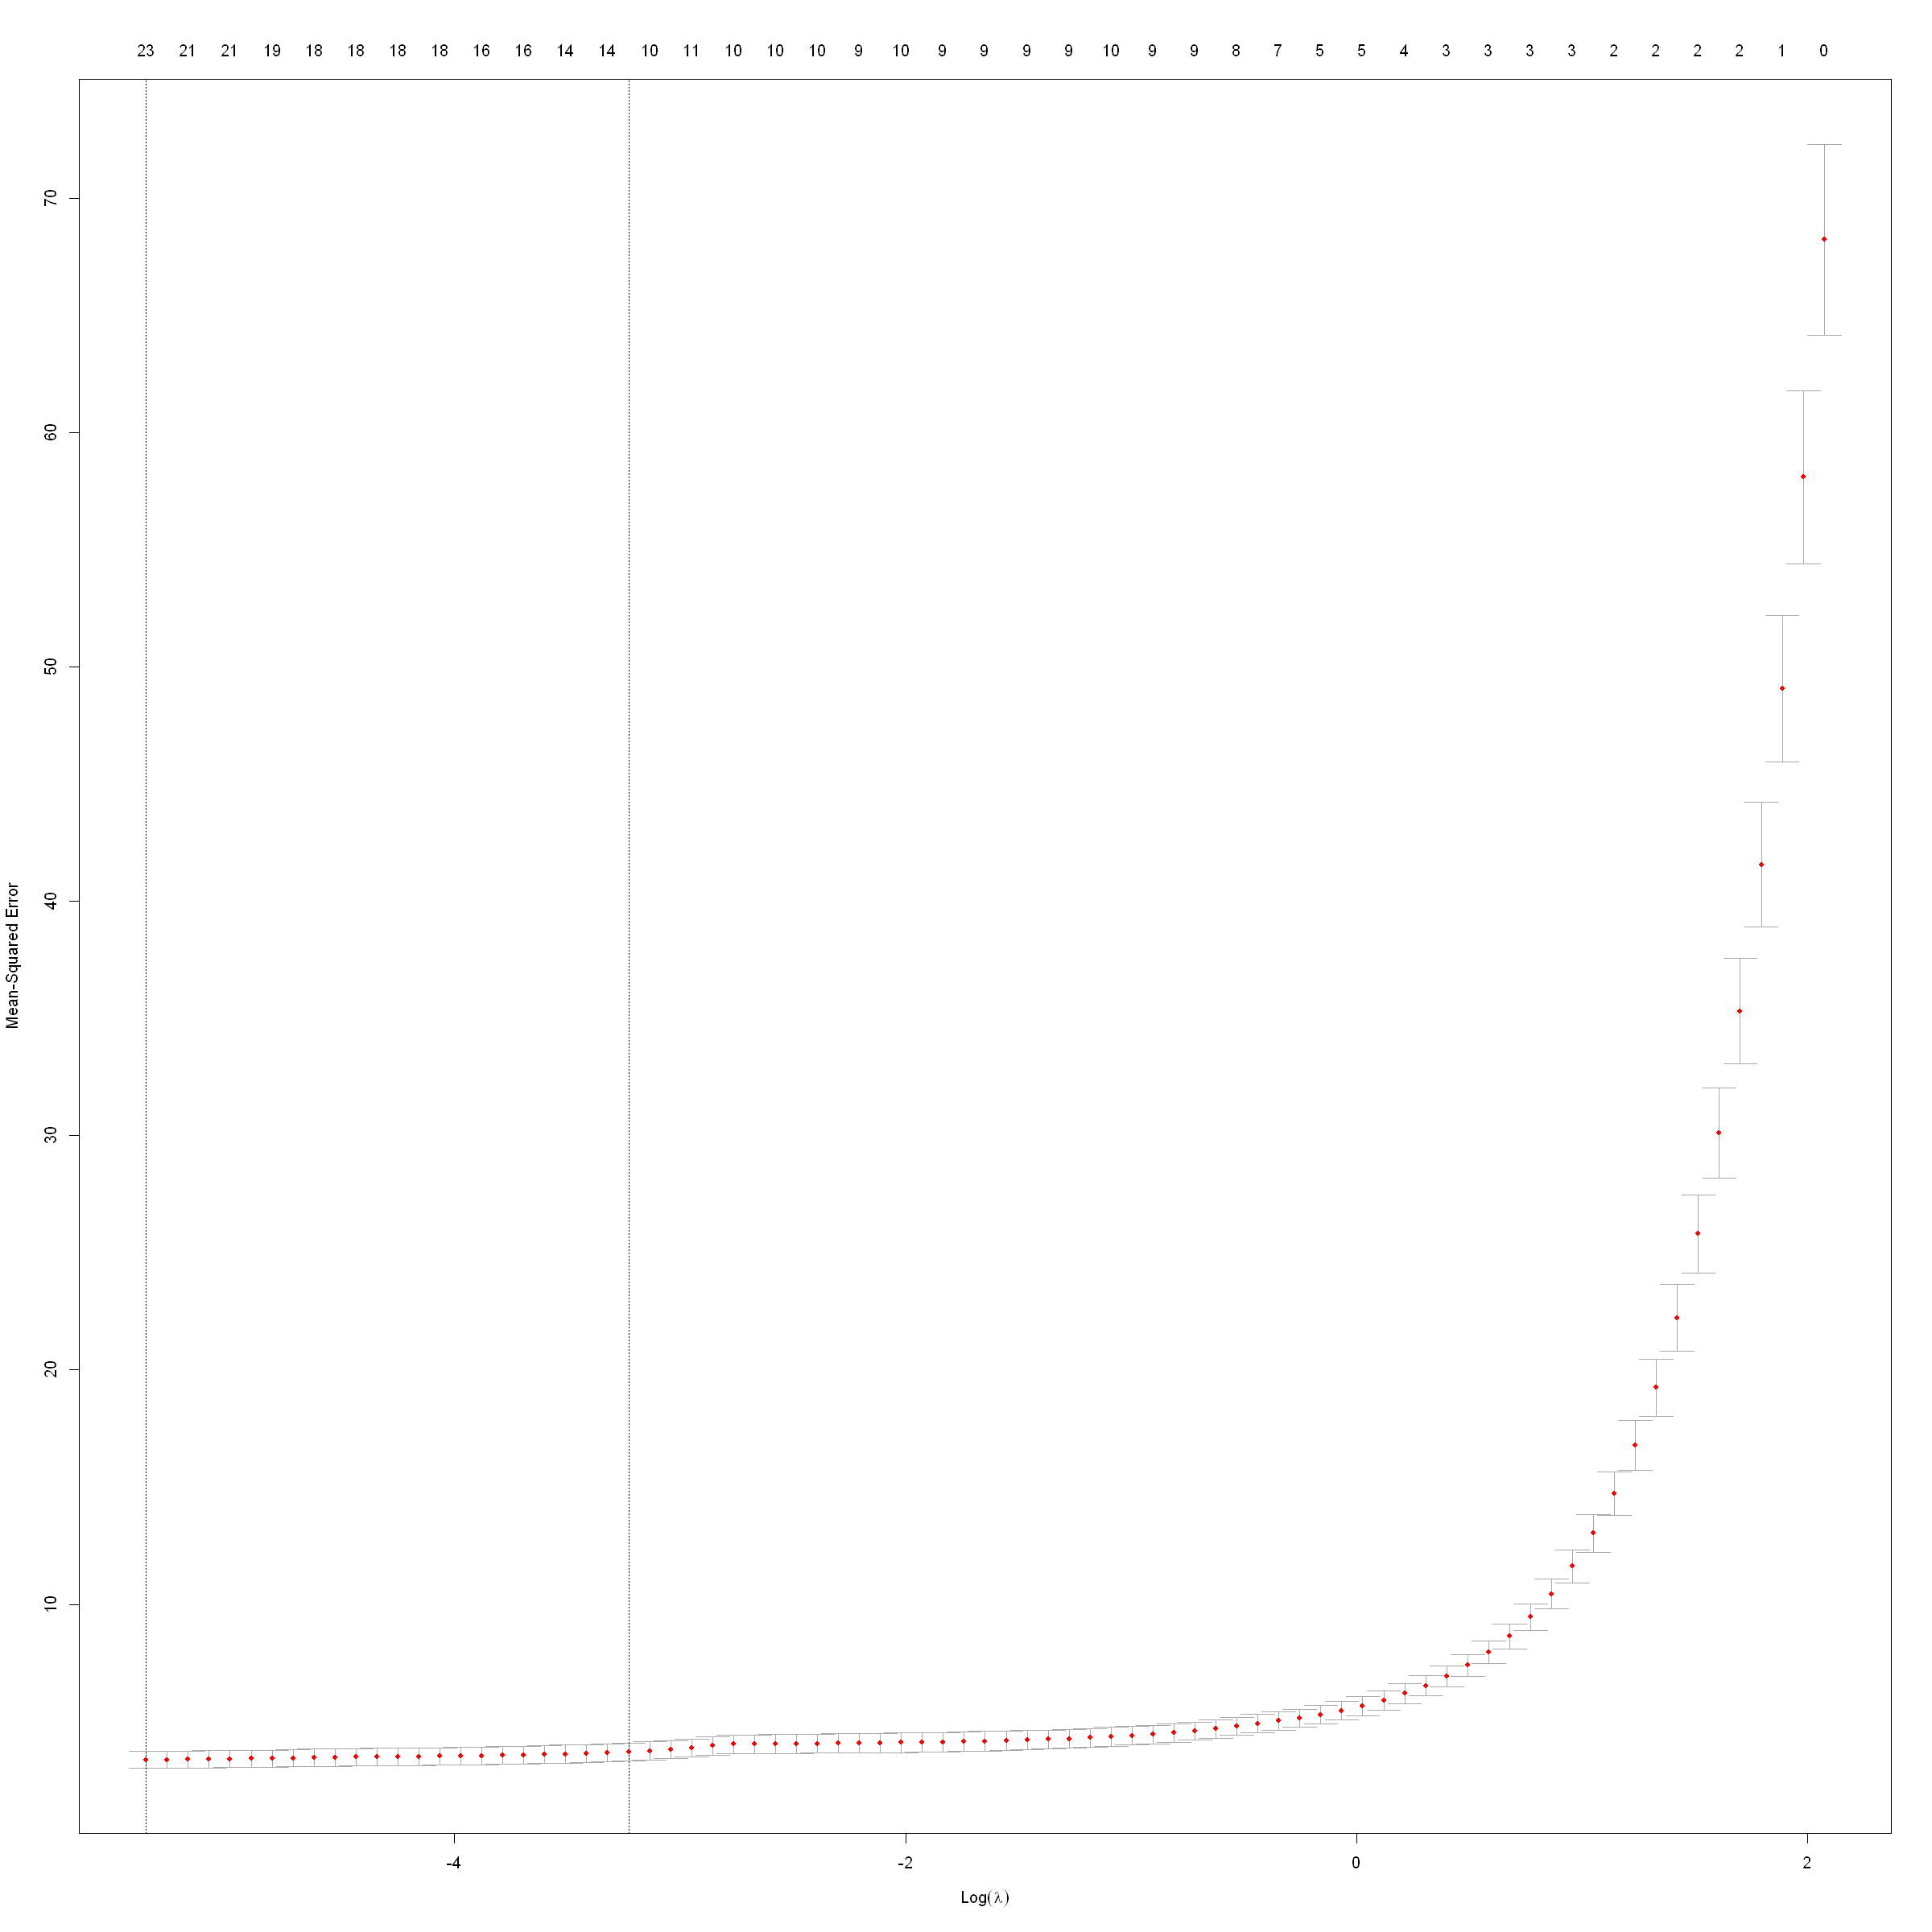

In [108]:
# First line: Min MSE
# Second line: One standard deviation
set.seed(1)
fit = glmnet(x, y, alpha=1, family = 'gaussian',)
fit_cv <- cv.glmnet(x, y, alpha=1, family = 'gaussian')
plot(fit_cv)

In [149]:
x_test = as.matrix(dfh_test_lasso[, -17])
x_test = scale(x_test, center = TRUE, scale = TRUE)

In [151]:
y_test = as.matrix(dfh_test_lasso[,"energy_kwh"])

In [150]:
pred.lasso = predict(fit_cv, s = fit_cv$lambda.min, x_test)

In [152]:
mean((y_test- pred.lasso)^2)

[1] 3.835432

In [154]:
head(test_compare_lasso)

,Observed.Response,X1
,<dbl>,<dbl>
15,55.056,52.42374
18,49.640,47.34620
19,49.773,45.89537
26,53.998,51.80916
30,53.247,51.93904
34,49.822,50.45390


In [153]:
test_compare_lasso = data.frame("Observed Response" = y_test, " Lasso" = pred.lasso)

In [156]:
png("../../figures/Lasso-model-April-2019.png",height=4000,width=5000,res=360)
ggplot(test_compare_lasso) + 
 geom_point(aes(x = Observed.Response, y = X1),size = 5,alpha = 0.4) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Lasso Model performance ", y = "Energy consumption (kWh)", x = "Observation")
dev.off()

png 
  2

In [118]:
fit_cv$lambda.min

[1] 0.004663705

In [110]:
get_coe <- function(the_fit,the_lamb){
  Coefficients <- coef(the_fit, s = the_lamb)
  Active.Index <- which(Coefficients != 0)
  Active.Coefficients <- Coefficients[Active.Index]
  re <- data.frame(rownames(Coefficients)[Active.Index],Active.Coefficients)
  re <- data.table('var_names'=rownames(Coefficients)[Active.Index],
                   'coef'=Active.Coefficients)
  re$expcoef <- exp(re$coef)
  return(re[order(expcoef)])
}

In [127]:
Coe = get_coe(fit_cv,fit_cv$lambda.min)

In [128]:
Coe

var_names,coef,expcoef
<chr>,<dbl>,<dbl>
accel_bin_5_time_hr,-3.2366414735,3.929565e-02
speed_bin_4_time_hr_accel_bin_3_time_hr,-2.3180564022,9.846478e-02
speed_bin_1_time_hr_accel_bin_1_time_hr,-2.0028918848,1.349445e-01
speed_bin_4_time_hr,-0.7664045134,4.646808e-01
TAVG,-0.4850332577,6.156767e-01
speed_bin_4_time_hr_accel_bin_1_time_hr,-0.3761710010,6.864849e-01
avg_interval_speed_mph,-0.3112369133,7.325403e-01
speed_bin_2_time_hr_accel_bin_1_time_hr,-0.3109018563,7.327858e-01
speed_bin_2_time_hr_accel_bin_5_time_hr,-0.2251221535,7.984187e-01


In [140]:
png("../../figures/lasso coefficient.png",height=4000,width=4000,res=360)
ggplot(Coe,aes(coef, reorder(var_names,coef), color = coef > 0)) +
   xlim(-5, 5) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Variables") +
  xlab("Coefficient") +
  ylab(NULL)
dev.off()

Warning message:
"Removed 1 rows containing missing values (geom_point)."


png 
  2

In [142]:
library(lasso2)

ERROR: Error in library(lasso2): there is no package called 'lasso2'


In [126]:
coef(fit_cv, s = "lambda.1se") %>%
  #tidy() %>%
  #filter(row != "(Intercept)") %>%
  ggplot(aes(value, reorder(row, value), color = value > 0)) +
  geom_point(show.legend = FALSE) +
  ggtitle("Influential variables") +
  xlab("Coefficient") +
  ylab(NULL)

ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not an S4 object with class dgCMatrix


In [97]:
get_plot<- function(the_fit_cv,the_lamb,toplot = seq(1,50,2)){
    Coefficients <- coef(the_fit_cv, s = the_lamb)
    Active.Index <- which(Coefficients != 0)
    coeall <- coef(the_fit_cv, s = the_fit_cv$lambda[toplot])
    coe <- coeall[Active.Index[-1],]
    ylims=c(-max(abs(coe)),max(abs(coe)))
    sp <- spline(log(the_fit_cv$lambda[toplot]),coe[1,],n=100)
    plot(sp,type='l',col =1,lty=1, 
         ylim = ylims,ylab = 'Coefficient', xlab = 'log(lambda)') 
    abline(h=0) 
    for(i in c(2:nrow(coe))){
        lines(spline(log(the_fit_cv$lambda[toplot]),coe[i,],n=1000),
              col =i,lty=i)
    }
    legend("bottomright",legend=rownames(coe),col=c(1:nrow(coe)),
           lty=c(1:nrow(coe)),
           cex=0.5)
}

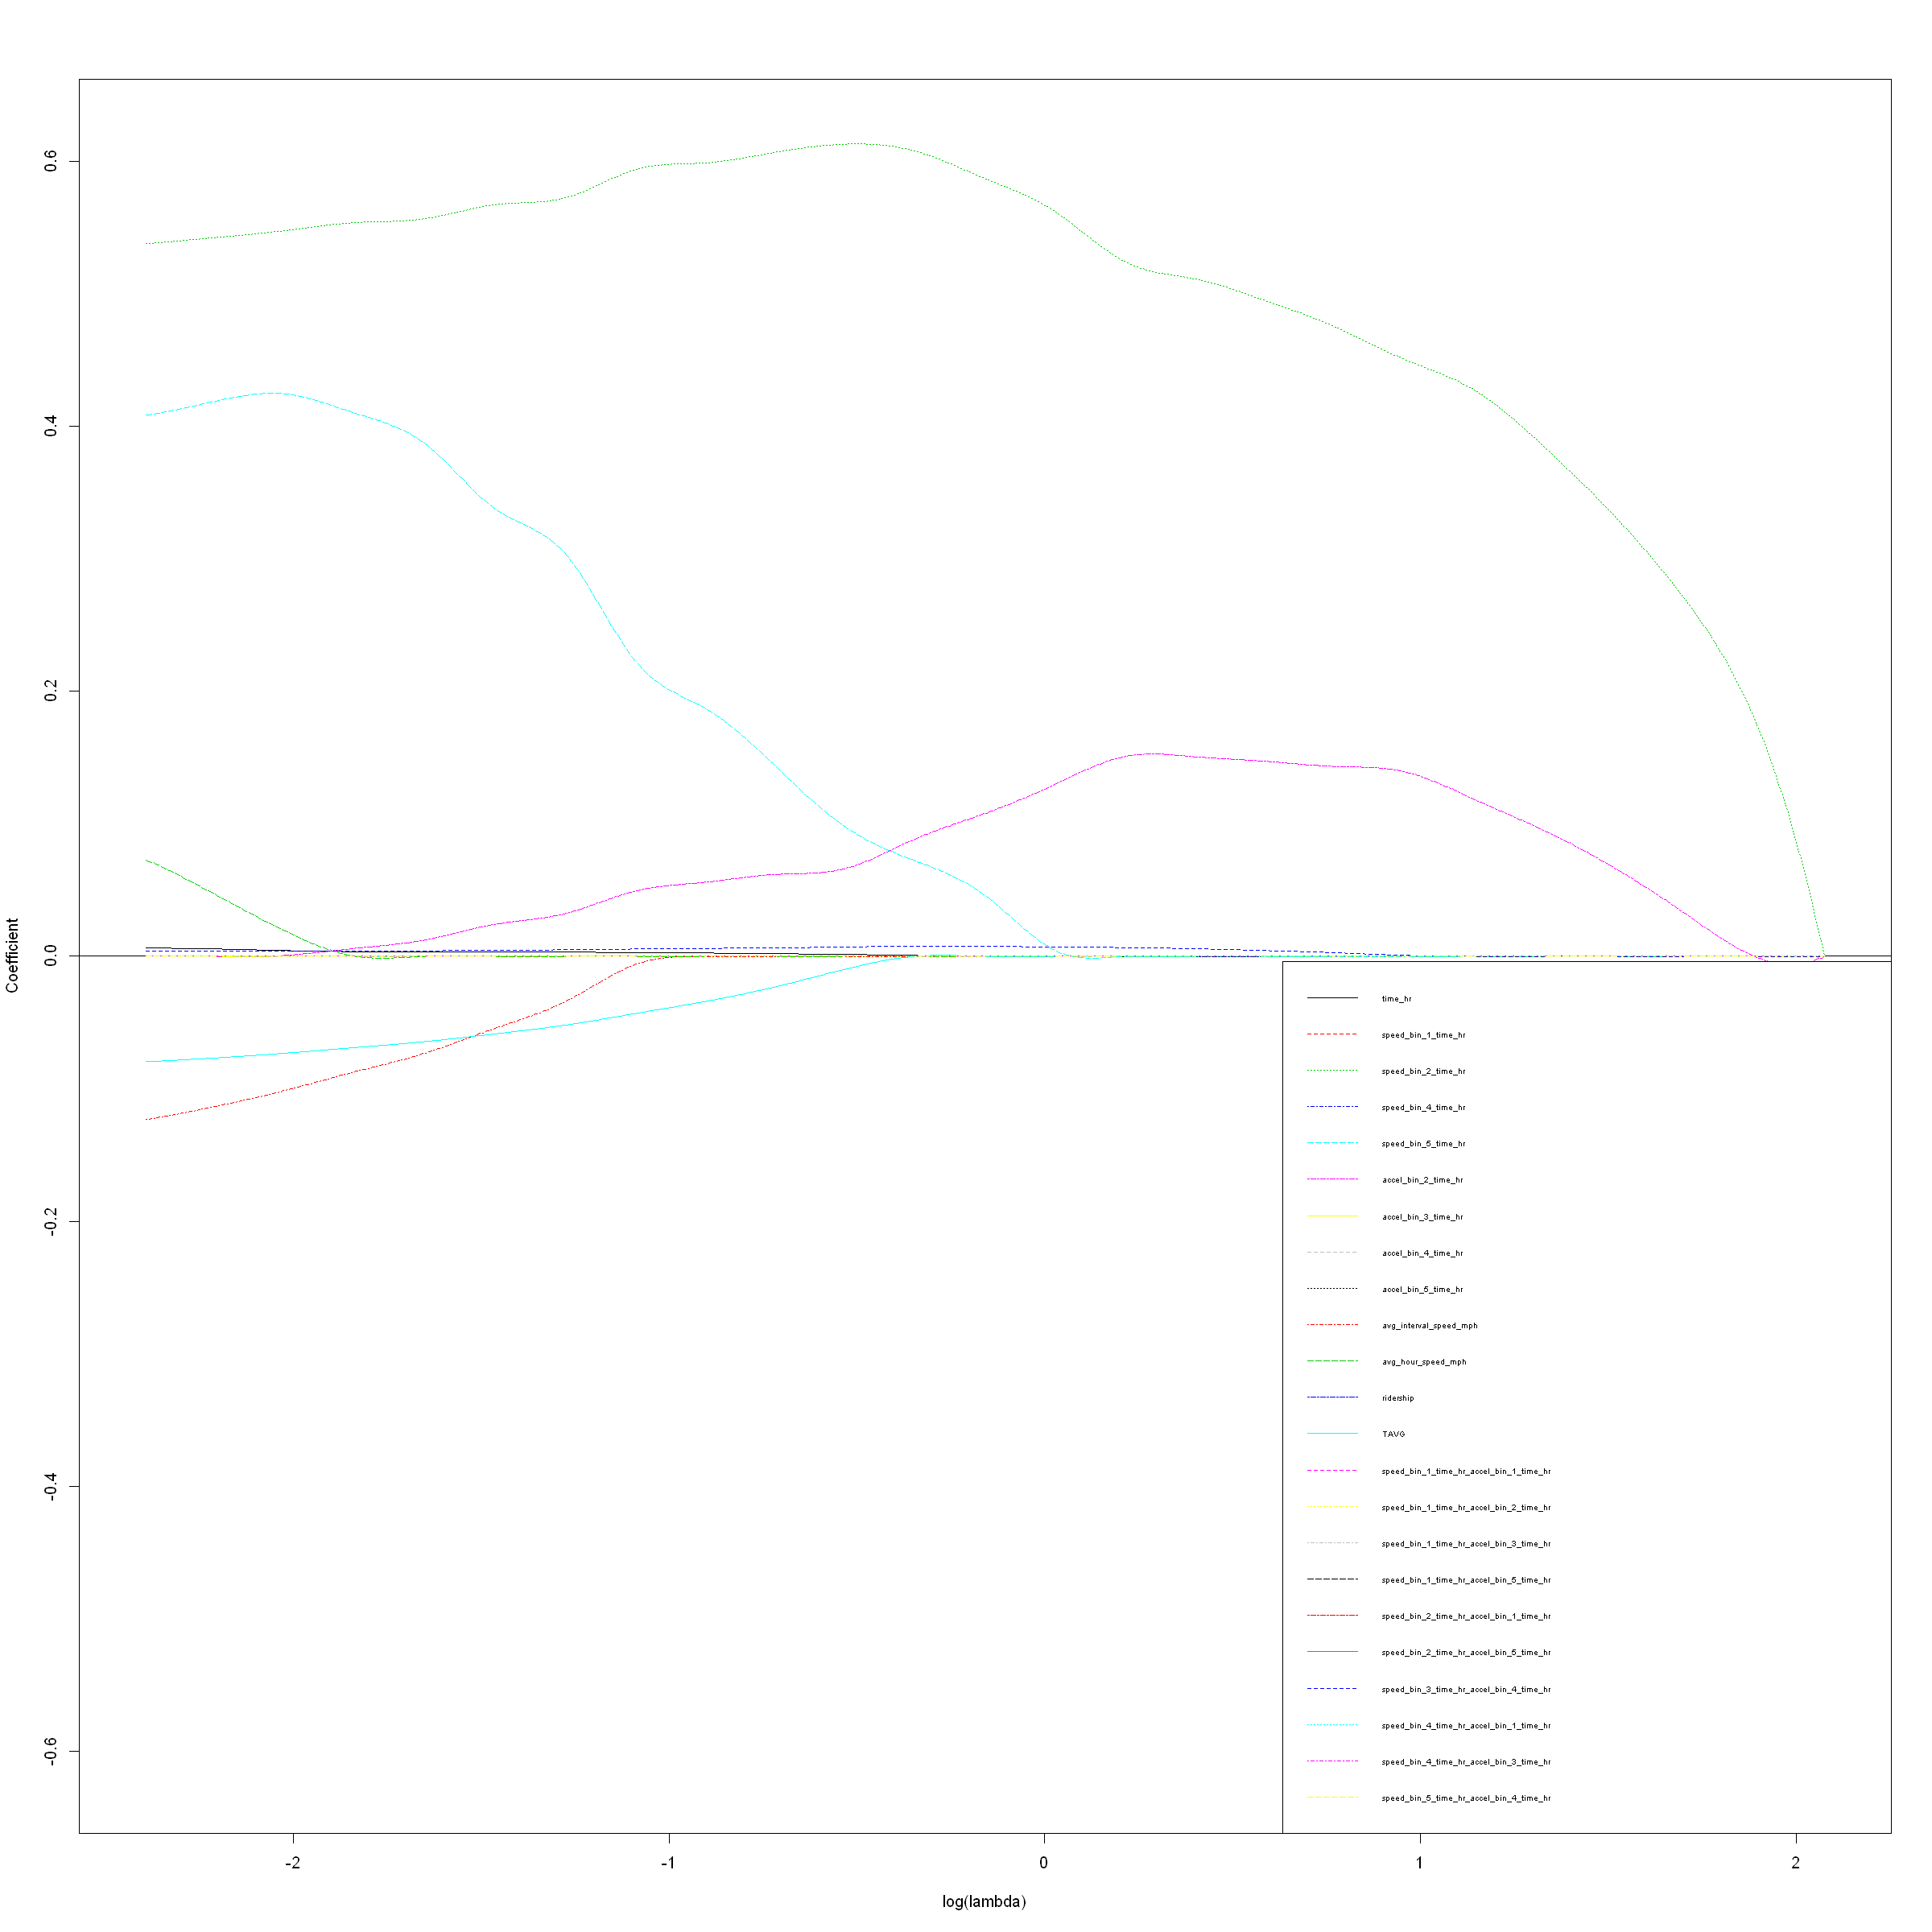

In [103]:
options(repr.plot.width = 20, repr.plot.height = 20)
get_plot(fit_cv,exp(log(fit_cv$lambda.min)-1))

In [84]:
lar


Call:
lars(x = x, y = y, type = "lasso")
R-squared: 0.964 
Sequence of LASSO moves:
     speed_bin_2_time_hr accel_bin_2_time_hr
Var                    4                   9
Step                   1                   2
     speed_bin_3_time_hr_accel_bin_4_time_hr ridership speed_bin_5_time_hr
Var                                       30        15                   7
Step                                       3         4                   5
     speed_bin_3_time_hr time_hr TAVG avg_interval_speed_mph
Var                    5       2   16                     13
Step                   6       7    8                      9
     accel_bin_2_time_hr avg_hour_speed_mph accel_bin_3_time_hr
Var                   -9                 14                  10
Step                  10                 11                  12
     speed_bin_4_time_hr_accel_bin_1_time_hr speed_bin_3_time_hr
Var                                       32                  -5
Step                                      13      

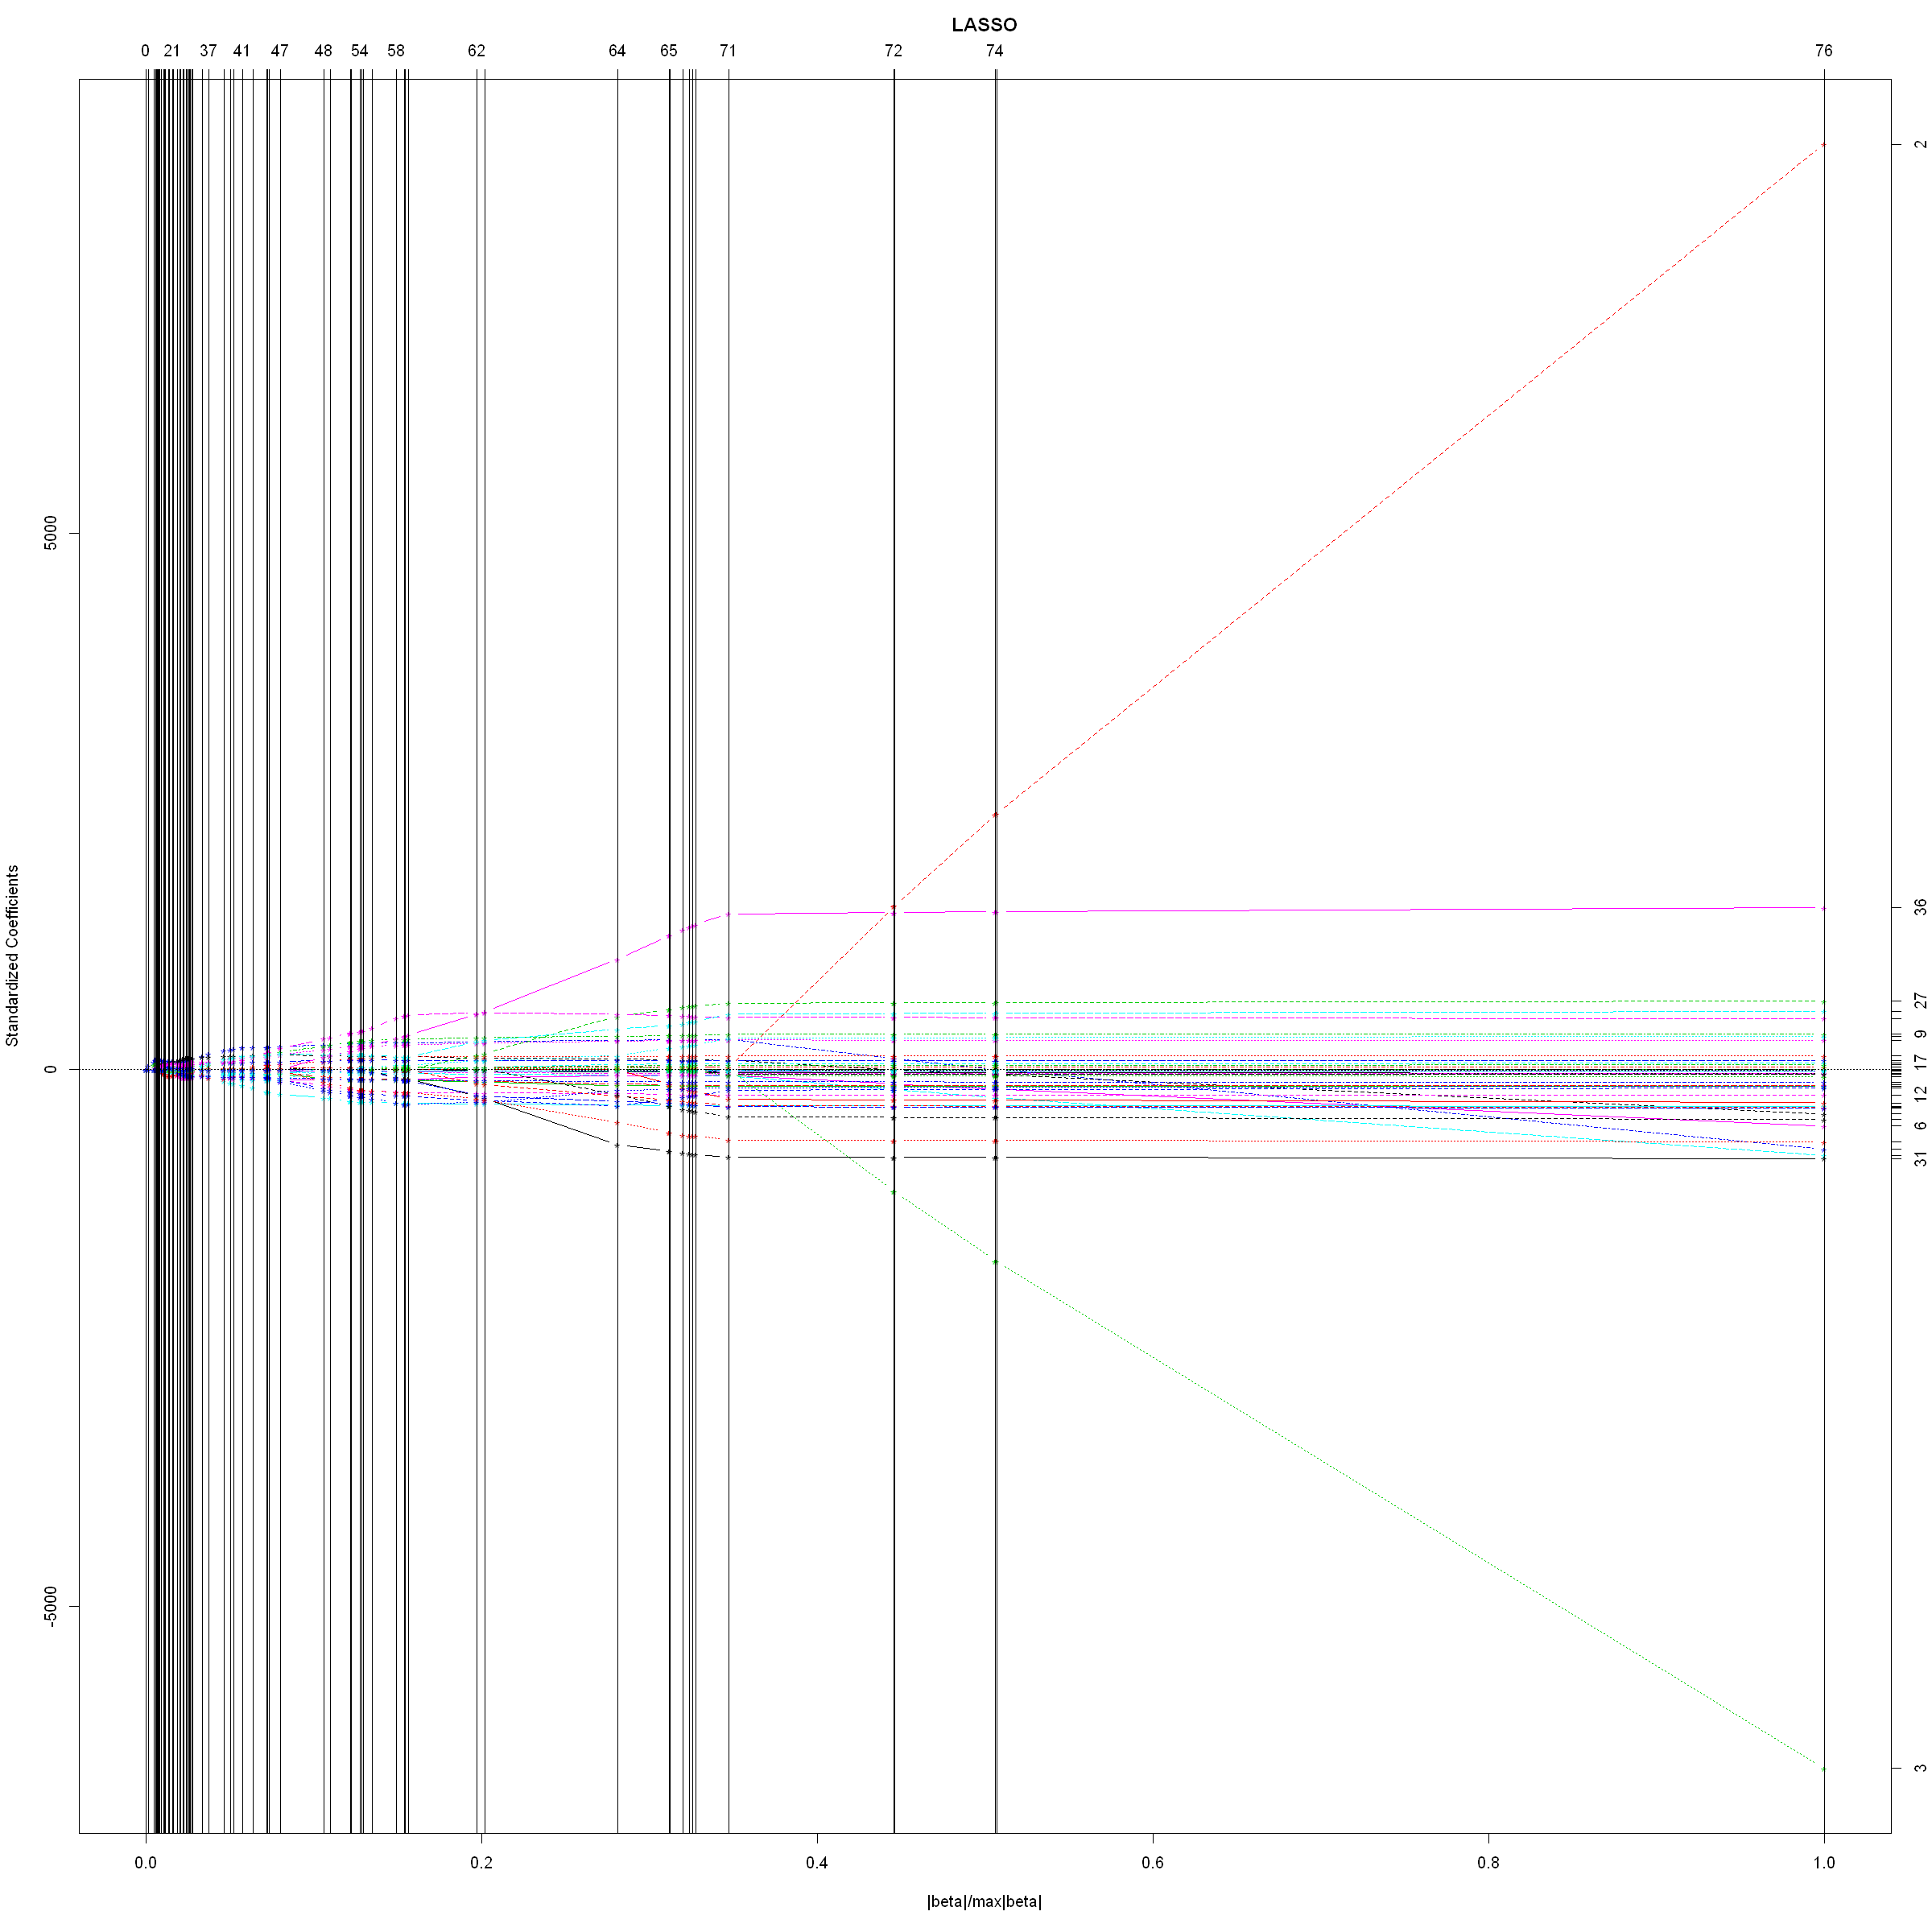

In [79]:
plot(lar)

In [80]:
summary(lar)

,Df,Rss,Cp
,<dbl>,<dbl>,<dbl>
0,1,37338.792,13470.20332
1,2,26074.557,9244.44804
2,3,7012.696,2092.04409
3,4,3534.526,788.59818
4,5,3244.761,681.84160
5,6,2766.414,504.30597
6,7,2757.266,502.87237
7,8,2631.351,457.61314
8,9,2304.164,336.81184


In [81]:
lar$Cp[which.min(lar$Cp)]

50 
29.27486

In [82]:
lar$beta

,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,accel_bin_1_time_hr,accel_bin_2_time_hr,accel_bin_3_time_hr,...,speed_bin_4_time_hr_accel_bin_1_time_hr,speed_bin_4_time_hr_accel_bin_2_time_hr,speed_bin_4_time_hr_accel_bin_3_time_hr,speed_bin_4_time_hr_accel_bin_4_time_hr,speed_bin_4_time_hr_accel_bin_5_time_hr,speed_bin_5_time_hr_accel_bin_1_time_hr,speed_bin_5_time_hr_accel_bin_2_time_hr,speed_bin_5_time_hr_accel_bin_3_time_hr,speed_bin_5_time_hr_accel_bin_4_time_hr,speed_bin_5_time_hr_accel_bin_5_time_hr
0,0,0.0000000000,0.000000000,0.0000000,0.000000000,0.00000000,0.00000000,0,0.00000000,0.000000e+00,...,0.00000000,0,0.000000000,0,0,0,0.0000000000,0,0.000000000,0
1,0,0.0000000000,0.000000000,0.1889507,0.000000000,0.00000000,0.00000000,0,0.00000000,0.000000e+00,...,0.00000000,0,0.000000000,0,0,0,0.0000000000,0,0.000000000,0
2,0,0.0000000000,0.000000000,0.4358610,0.000000000,0.00000000,0.00000000,0,0.13485817,0.000000e+00,...,0.00000000,0,0.000000000,0,0,0,0.0000000000,0,0.000000000,0
3,0,0.0000000000,0.000000000,0.5147266,0.000000000,0.00000000,0.00000000,0,0.15140848,0.000000e+00,...,0.00000000,0,0.000000000,0,0,0,0.0000000000,0,0.000000000,0
4,0,0.0000000000,0.000000000,0.5484015,0.000000000,0.00000000,0.00000000,0,0.13615030,0.000000e+00,...,0.00000000,0,0.000000000,0,0,0,0.0000000000,0,0.000000000,0
5,0,0.0000000000,0.000000000,0.6095242,0.000000000,0.00000000,0.06977429,0,0.09026062,0.000000e+00,...,0.00000000,0,0.000000000,0,0,0,0.0000000000,0,0.000000000,0
6,0,0.0000000000,0.000000000,0.6104733,0.003825037,0.00000000,0.06937317,0,0.08859242,0.000000e+00,...,0.00000000,0,0.000000000,0,0,0,0.0000000000,0,0.000000000,0
7,0,0.0009643116,0.000000000,0.6224878,0.052380579,0.00000000,0.06366001,0,0.06306431,0.000000e+00,...,0.00000000,0,0.000000000,0,0,0,0.0000000000,0,0.000000000,0
8,0,0.0027983319,0.000000000,0.6007641,0.080838289,0.00000000,0.21327749,0,0.03694246,0.000000e+00,...,0.00000000,0,0.000000000,0,0,0,0.0000000000,0,0.000000000,0
9,0,0.0033574096,0.000000000,0.5715055,0.129247288,0.00000000,0.36398728,0,0.00000000,0.000000e+00,...,0.00000000,0,0.000000000,0,0,0,0.0000000000,0,0.000000000,0


In [83]:
coef <- coef.lars(lar,mode="step",s = 51) #s = step+1
coef[coef!=0]

speed_bin_2_time_hr                     speed_bin_3_time_hr 
                           1.411368e+00                           -2.432262e-01 
                    speed_bin_4_time_hr                     speed_bin_5_time_hr 
                          -1.123114e+00                            1.483775e+00 
                    accel_bin_1_time_hr                     accel_bin_2_time_hr 
                           1.072137e+00                            7.954892e-01 
                    accel_bin_3_time_hr                     accel_bin_4_time_hr 
                           9.423048e-02                           -2.072694e+00 
                    accel_bin_5_time_hr                  avg_interval_speed_mph 
                          -3.835002e+00                           -1.620148e-01 
                     avg_hour_speed_mph                               ridership 
                           3.340336e-01                            4.821247e-06 
                                   TAVG speed_bin_1_time_hr_accel_bin_2_time_hr 
                          -6.662678e-02                            4.713347e-03 
speed_bin_1_time_hr_accel_bin_3_time_hr speed_bin_1_time_hr_accel_bin_4_time_hr 
                           1.944284e-05                           -4.087787e-03 
speed_bin_1_time_hr_accel_bin_5_time_hr speed_bin_2_time_hr_accel_bin_1_time_hr 
                          -1.319466e-02                           -9.367552e-02 
speed_bin_2_time_hr_accel_bin_3_time_hr speed_bin_3_time_hr_accel_bin_2_time_hr 
                          -6.623792e-04                           -4.266731e-02 
speed_bin_3_time_hr_accel_bin_3_time_hr speed_bin_3_time_hr_accel_bin_4_time_hr 
                          -1.462926e-03                            1.375742e-01 
speed_bin_4_time_hr_accel_bin_3_time_hr speed_bin_4_time_hr_accel_bin_4_time_hr 
                          -8.919299e-03                            9.162711e-02 
speed_bin_4_time_hr_accel_bin_5_time_hr speed_bin_5_time_hr_accel_bin_2_time_hr 
                           2.972738e-01                           -4.319173e-02

In [173]:
png("../../figures/ridge-April-2019.png",height=5000,width=5000,res=360)
matplot(modelFit_hour_linear_ridge$lambda, t(modelFit_hour_linear_ridge$coef), xlab = expression(lamdba), ylab = "Cofficients",

type = "l", lty = 1:20)

abline(v = modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)])
dev.off()

png 
  2

In [168]:
modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)]
modelFit_hour_linear_ridge$coef[which.min(modelFit_hour_linear_ridge$GCV)]

[1] 1

[1] 0.3052366

In [170]:
png("../../figures/ridge-April-2019.png",height=5000,width=5000,res=360)
plot(modelFit_hour_linear_ridge$lambda, modelFit_hour_linear_ridge$GCV, type = "l", xlab = expression(lambda), 
    ylab = expression(beta))
abline(v = modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)])
dev.off()

png 
  2

In [143]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred1,
                          "Hour"=dfh_test$hour,"Year" = dfh_test$year,"Day" =dfh_test$day,"Month"=dfh_test$month)

In [144]:
test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))

In [145]:
head(test_compare)

,Observed.Response,X.Linear_model,Hour,Year,Day,Month,Date
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<date>
10,50.928,51.84622,14,2019,1,4,2019-04-01
11,54.272,54.41932,15,2019,1,4,2019-04-01
13,57.666,56.57205,17,2019,1,4,2019-04-01
14,57.869,54.20101,18,2019,1,4,2019-04-01
21,32.478,32.14679,3,2019,1,4,2019-04-01
25,57.236,55.91901,7,2019,1,4,2019-04-01


In [ ]:
colnames()

In [147]:
test_compare1 = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")

In [155]:
png("../../figures/Linear-model-April-2019.png",height=4000,width=5000,res=360)
ggplot(test_compare1) + 
 geom_line(aes(x=Date, y=x,color = type),size = 1,alpha = 0.4) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Date")
dev.off()

png 
  2

### Experimental part

In [ ]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred_linear,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))
test_compare_plot = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")

# Statisitics analysis

In [16]:
# Calculate the MSE of LM
mean((test_compare$Observed.Response - test_compare$X.Model1)^2,na.rm = TRUE)
#Calculate MAPE of LM
mean(abs((test_compare$Observed.Response - test_compare$X.Model1)/test_compare$Observed.Response),na.rm =TRUE) * 100

[1] 2.480333

[1] 3.064999

Warning message:
"Removed 4 rows containing missing values (geom_point)."


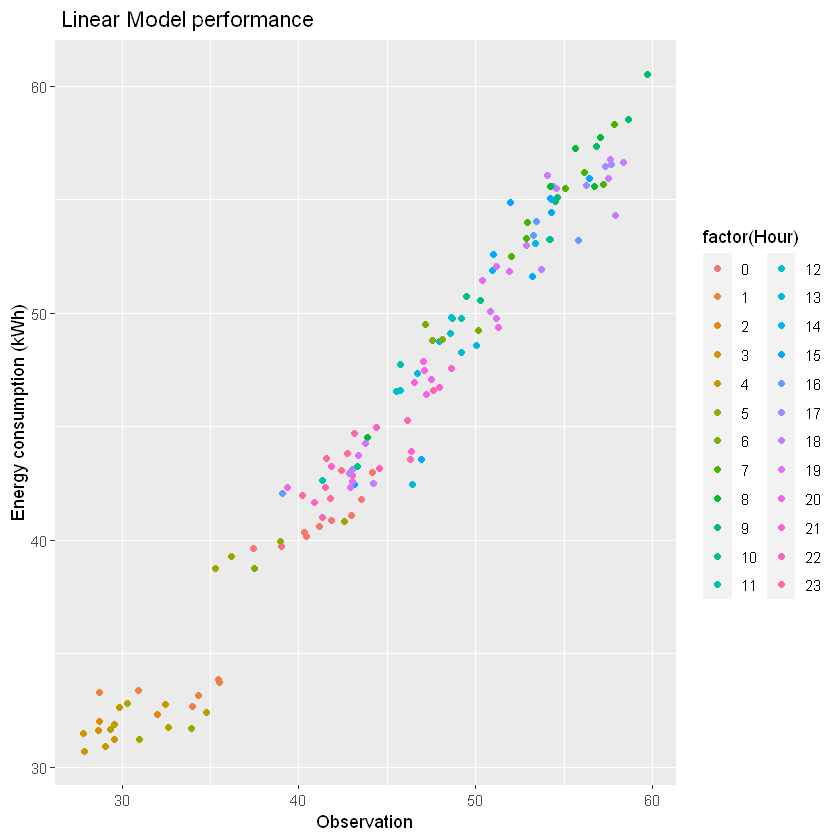

In [17]:
ggplot(test_compare) + 
 geom_point(aes(x=Observed.Response, y=X.Model1,color=factor(Hour))) +
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Observation")